In [864]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Building Permit dataset for Chicago

In [648]:
chicago_df=pd.read_csv('../src/data/Building_Permits.csv')

C:\Users\44742\AppData\Local\Temp\ipykernel_245908\1767199503.py:1: DtypeWarning: Columns (1,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df=pd.read_csv('../src/data/Building_Permits.csv')


In [649]:
chicago_df.shape

(730511, 119)

In [866]:
chicago_df.iloc[:,50:70].sample(3)

CONTACT_6_TYPE CONTACT_6_NAME CONTACT_6_CITY CONTACT_6_STATE  \
665460            NaN            NaN            NaN             NaN   
424187            NaN            NaN            NaN             NaN   
17018             NaN            NaN            NaN             NaN   

       CONTACT_6_ZIPCODE CONTACT_7_TYPE CONTACT_7_NAME CONTACT_7_CITY  \
665460               NaN            NaN            NaN            NaN   
424187               NaN            NaN            NaN            NaN   
17018                NaN            NaN            NaN            NaN   

       CONTACT_7_STATE CONTACT_7_ZIPCODE CONTACT_8_TYPE CONTACT_8_NAME  \
665460             NaN               NaN            NaN            NaN   
424187             NaN               NaN            NaN            NaN   
17018              NaN               NaN            NaN            NaN   

       CONTACT_8_CITY CONTACT_8_STATE CONTACT_8_ZIPCODE CONTACT_9_TYPE  \
665460            NaN             NaN               NaN            NaN   
424187            NaN             NaN               NaN            NaN   
17018             NaN             NaN               NaN            NaN   

       CONTACT_9_NAME CONTACT_9_CITY CONTACT_9_STATE CONTACT_9_ZIPCODE  
665460            NaN            NaN             NaN               NaN  
424187            NaN            NaN             NaN               NaN  
17018             NaN            NaN             NaN               NaN

### We have a lot of nulls

Let's drop columns where the number of nulls is 15% or more

In [652]:
#Calculate the percentage of null rows for each column
col_nulls=chicago_df.isna().sum()*100/chicago_df.shape[0]
#Valid columns (where the number of nulls is less than 15%)
col_valid=col_nulls[col_nulls<15].sort_values(ascending=False)

In [653]:
#Non valid columns (where the number of nulls is 15% or more)
col_non_valid=col_nulls[col_nulls>=15].sort_values(ascending=False)
col_non_valid.index

Index(['CONTACT_15_TYPE', 'CONTACT_15_ZIPCODE', 'CONTACT_15_STATE',
       'CONTACT_15_CITY', 'CONTACT_15_NAME', 'CONTACT_14_STATE',
       'CONTACT_14_TYPE', 'CONTACT_14_NAME', 'CONTACT_14_CITY',
       'CONTACT_14_ZIPCODE', 'CONTACT_13_TYPE', 'CONTACT_13_NAME',
       'CONTACT_13_CITY', 'CONTACT_13_STATE', 'CONTACT_13_ZIPCODE',
       'CONTACT_12_ZIPCODE', 'CONTACT_12_STATE', 'CONTACT_12_CITY',
       'CONTACT_12_TYPE', 'CONTACT_12_NAME', 'CONTACT_11_ZIPCODE',
       'CONTACT_11_STATE', 'CONTACT_11_CITY', 'CONTACT_11_NAME',
       'CONTACT_11_TYPE', 'PIN10', 'PIN9', 'PIN8', 'CONTACT_10_ZIPCODE',
       'CONTACT_10_STATE', 'PIN7', 'CONTACT_10_CITY', 'CONTACT_10_TYPE',
       'CONTACT_10_NAME', 'PIN6', 'PIN5', 'PIN4', 'CONTACT_9_ZIPCODE',
       'CONTACT_9_STATE', 'CONTACT_9_CITY', 'CONTACT_9_TYPE', 'CONTACT_9_NAME',
       'PIN3', 'CONTACT_8_ZIPCODE', 'CONTACT_8_STATE', 'CONTACT_8_CITY',
       'CONTACT_8_NAME', 'CONTACT_8_TYPE', 'PIN2', 'CONTACT_7_ZIPCODE',
       'CONTACT_7_STATE', 

In [654]:
#Drop the non-valid columns
chicago_clean=chicago_df.drop(columns=col_non_valid.index)
chicago_clean;

Let's drop columns that do not hold valuable information for the analysis

In [655]:
chicago_wip=chicago_clean.drop(columns=['ID','PERMIT#','PIN1','XCOORDINATE','YCOORDINATE'])
chicago_wip.shape

(730511, 35)

Let's drop columns that might hold useful information but will be ommited from the initial EDA

In [656]:
chicago_wip2=chicago_wip.drop(columns=['CONTACT_1_STATE','CONTACT_1_ZIPCODE','SUFFIX','CONTACT_1_ZIPCODE','CONTACT_1_NAME','LOCATION'])
print(chicago_wip2.shape)
chicago_wip2;

(730511, 30)


In [657]:
chicago_wip3=chicago_wip2.drop(columns=['STREET_NAME','CONTACT_1_CITY','STREET_NAME','OTHER_FEE_PAID','STREET DIRECTION','ZONING_FEE_PAID','SUBTOTAL_WAIVED','ZONING_FEE_UNPAID','OTHER_FEE_WAIVED',\
                                        'BUILDING_FEE_UNPAID','OTHER_FEE_UNPAID','BUILDING_FEE_WAIVED'])
chicago_wip3

PERMIT_TYPE           REVIEW_TYPE  \
0       PERMIT - RENOVATION/ALTERATION  STANDARD PLAN REVIEW   
1            PERMIT - NEW CONSTRUCTION  STANDARD PLAN REVIEW   
2                       PERMIT - SIGNS           SIGN PERMIT   
3       PERMIT - RENOVATION/ALTERATION             SELF CERT   
4       PERMIT - RENOVATION/ALTERATION             SELF CERT   
...                                ...                   ...   
730506    PERMIT - EASY PERMIT PROCESS           EASY PERMIT   
730507    PERMIT - EASY PERMIT PROCESS       EASY PERMIT WEB   
730508        PERMIT - ELECTRIC WIRING       EASY PERMIT WEB   
730509    PERMIT - EASY PERMIT PROCESS           EASY PERMIT   
730510        PERMIT - ELECTRIC WIRING       EASY PERMIT WEB   

       APPLICATION_START_DATE  ISSUE_DATE  PROCESSING_TIME  STREET_NUMBER  \
0                  10/14/2005  01/03/2006             81.0           2728   
1                  12/05/2005  03/29/2006            114.0           1409   
2                  10/17/2005  01/12/2006             87.0            120   
3                  01/25/2006  01/26/2006              1.0             71   
4                  01/21/2006  01/21/2006              0.0           4901   
...                       ...         ...              ...            ...   
730506             02/15/2023  02/24/2023              9.0           6926   
730507             02/24/2023  02/24/2023              0.0           2529   
730508             02/24/2023  02/24/2023              0.0           1125   
730509             02/24/2023  02/24/2023              0.0           3328   
730510             02/24/2023  02/24/2023              0.0          12423   

                                         WORK_DESCRIPTION  BUILDING_FEE_PAID  \
0       INTERIOR REMODELING OF EXISTING 3 D.U. PER PLA...              125.0   
1       new construction, erect 3 story slab on grade ...             1029.6   
2                                  north elevation 386431               56.0   
3       Interior alteration of existing partial 34th f...             2408.0   
4       Interior alterations to the retail space on th...             2443.0   
...                                                   ...                ...   
730506  SOLAR PANEL PERMIT.  ERECT A PHOTOVOLTAIC ARRA...                0.0   
730507  FENCES: 165FT 0IN X 6FT 0IN: QTY 1 (not to be ...              150.0   
730508  TECH WILL PULL 100 CAT-6 CABLES, TERMINATE, AN...               75.0   
730509  REVISION TO PERMIT NO 100988130 TO CHANGE ELEC...               75.0   
730510                                     REPAIR SERVICE               75.0   

        SUBTOTAL_PAID  SUBTOTAL_UNPAID  ZONING_FEE_WAIVED  TOTAL_FEE  \
0               200.0              0.0                0.0      200.0   
1              1242.1              0.0                0.0     1242.1   
2                56.0              0.0                0.0       56.0   
3              2483.0              0.0                0.0     2483.0   
4              2518.0              0.0                0.0     2518.0   
...               ...              ...                ...        ...   
730506            0.0            275.0                0.0      275.0   
730507          150.0              0.0                0.0      150.0   
730508           75.0              0.0                0.0       75.0   
730509           75.0              0.0                0.0       75.0   
730510           75.0              0.0                0.0       75.0   

                     CONTACT_1_TYPE  REPORTED_COST  COMMUNITY_AREA  \
0       OWNER AS GENERAL CONTRACTOR         3000.0             NaN   
1                         ARCHITECT       190000.0             NaN   
2             CONTRACTOR-ELECTRICAL            0.0             NaN   
3               SELF CERT ARCHITECT       125000.0             NaN   
4               SELF CERT ARCHITECT        41527.0             NaN   
...                             ...            ...             ...   
730506          S

Let's check the null values for the remaining columns

In [658]:
#
chicago_wip3.isnull().sum()*100/chicago_wip3.shape[0]

PERMIT_TYPE                0.000000
REVIEW_TYPE                0.000958
APPLICATION_START_DATE     0.071457
ISSUE_DATE                 0.000000
PROCESSING_TIME            0.071457
STREET_NUMBER              0.000000
WORK_DESCRIPTION           0.007255
BUILDING_FEE_PAID          0.000000
SUBTOTAL_PAID              0.000000
SUBTOTAL_UNPAID            0.000000
ZONING_FEE_WAIVED          0.000000
TOTAL_FEE                  0.000000
CONTACT_1_TYPE             0.653378
REPORTED_COST              0.051060
COMMUNITY_AREA            14.351735
CENSUS_TRACT              14.927770
WARD                      14.380482
LATITUDE                   0.308551
LONGITUDE                  0.308551
dtype: float64

In [659]:
chicago_wip3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730511 entries, 0 to 730510
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   PERMIT_TYPE             730511 non-null  object 
 1   REVIEW_TYPE             730504 non-null  object 
 2   APPLICATION_START_DATE  729989 non-null  object 
 3   ISSUE_DATE              730511 non-null  object 
 4   PROCESSING_TIME         729989 non-null  float64
 5   STREET_NUMBER           730511 non-null  int64  
 6   WORK_DESCRIPTION        730458 non-null  object 
 7   BUILDING_FEE_PAID       730511 non-null  float64
 8   SUBTOTAL_PAID           730511 non-null  float64
 9   SUBTOTAL_UNPAID         730511 non-null  float64
 10  ZONING_FEE_WAIVED       730511 non-null  float64
 11  TOTAL_FEE               730511 non-null  float64
 12  CONTACT_1_TYPE          725738 non-null  object 
 13  REPORTED_COST           730138 non-null  float64
 14  COMMUNITY_AREA      

In [660]:
chicago_wip3.describe()

PROCESSING_TIME  STREET_NUMBER  BUILDING_FEE_PAID  SUBTOTAL_PAID  \
count    729989.000000  730511.000000      730511.000000  730511.000000   
mean         22.629837    3459.539303         675.572852     808.444783   
std         105.683331    2978.569953        5775.639286    6944.309270   
min       -2876.000000       1.000000           0.000000       0.000000   
25%           0.000000     946.000000          58.000000      75.000000   
50%           0.000000    2714.000000         150.000000     200.000000   
75%           8.000000    5346.000000         400.000000     450.000000   
max        5699.000000  111601.000000      882191.200000  999683.920000   

       SUBTOTAL_UNPAID  ZONING_FEE_WAIVED     TOTAL_FEE  REPORTED_COST  \
count     7.305110e+05      730511.000000  7.305110e+05   7.301380e+05   
mean      1.706921e+01           1.817716  9.478778e+02   2.179828e+05   
std       2.928526e+03         135.210814  1.157143e+04   1.836746e+07   
min      -1.440000e+04           0.000000 -1.152747e+04  -1.000000e+03   
25%       0.000000e+00           0.000000  7.500000e+01   5.000000e+02   
50%       0.000000e+00           0.000000  2.250000e+02   4.500000e+03   
75%       0.000000e+00           0.000000  5.000000e+02   2.000000e+04   
max       1.944425e+06      102250.000000  5.772092e+06   1.000000e+10   

       COMMUNITY_AREA   CENSUS_TRACT           WARD       LATITUDE  \
count   625670.000000  621462.000000  625460.000000  728257.000000   
mean        31.532530  310674.564295      27.169176      41.870021   
std         21.942272  317214.267549      15.097453       0.083764   
min          0.000000       0.000000       1.000000      41.644670   
25%         12.000000    7207.000000      14.000000      41.803620   
50%         28.000000  210400.000000      29.000000      41.885830   
75%         46.000000  630400.000000      42.000000      41.930764   
max         77.000000  980100.000000      50.000000      42.022780   

           LONGITUDE  
count  728257.000000  
mean      -87.672919  
std         0.059634  
min       -87.940225  
25%       -87.707301  
50%       -87.662388  
75%       -87.631931  
max       -87.524677

Change data types

In [661]:
chicago_wip3['ISSUE_DATE']=pd.to_datetime(chicago_wip3['ISSUE_DATE'])
chicago_wip3['APPLICATION_START_DATE']=pd.to_datetime(chicago_wip3['APPLICATION_START_DATE'])

In [662]:
chicago_wip3.nunique()

PERMIT_TYPE                   11
REVIEW_TYPE                   11
APPLICATION_START_DATE      6832
ISSUE_DATE                  6171
PROCESSING_TIME             1697
STREET_NUMBER              10690
WORK_DESCRIPTION          563792
BUILDING_FEE_PAID          49426
SUBTOTAL_PAID              53591
SUBTOTAL_UNPAID             1307
ZONING_FEE_WAIVED            137
TOTAL_FEE                  56498
CONTACT_1_TYPE                26
REPORTED_COST              45221
COMMUNITY_AREA                78
CENSUS_TRACT                1671
WARD                          50
LATITUDE                  246124
LONGITUDE                 246079
dtype: int64

### TOTAL NUMBER OF APPLICATIONS. IS OUR DATASET COMPLETE?

Let's check if we have consistent numbers of application for all years & wards

<AxesSubplot:xlabel='ISSUE_DATE'>

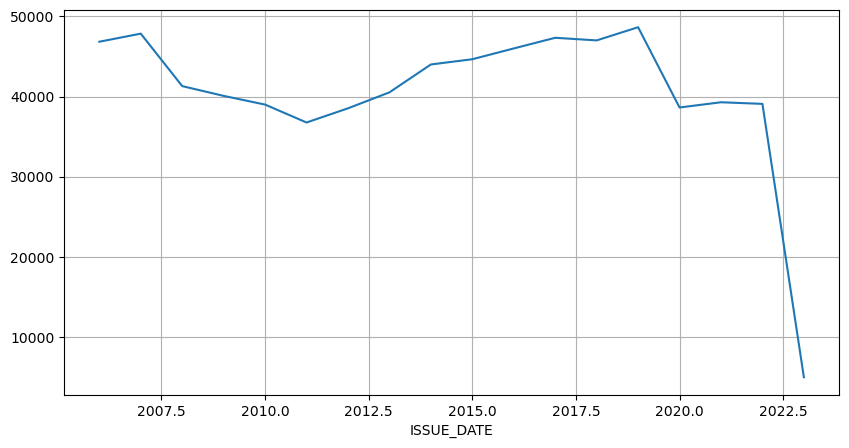

In [663]:
chicago_wip3.groupby(chicago_wip3['ISSUE_DATE'].dt.year).count()['PERMIT_TYPE'].plot(figsize=(10,5),grid=True)

<AxesSubplot:xlabel='ISSUE_DATE,ISSUE_DATE'>

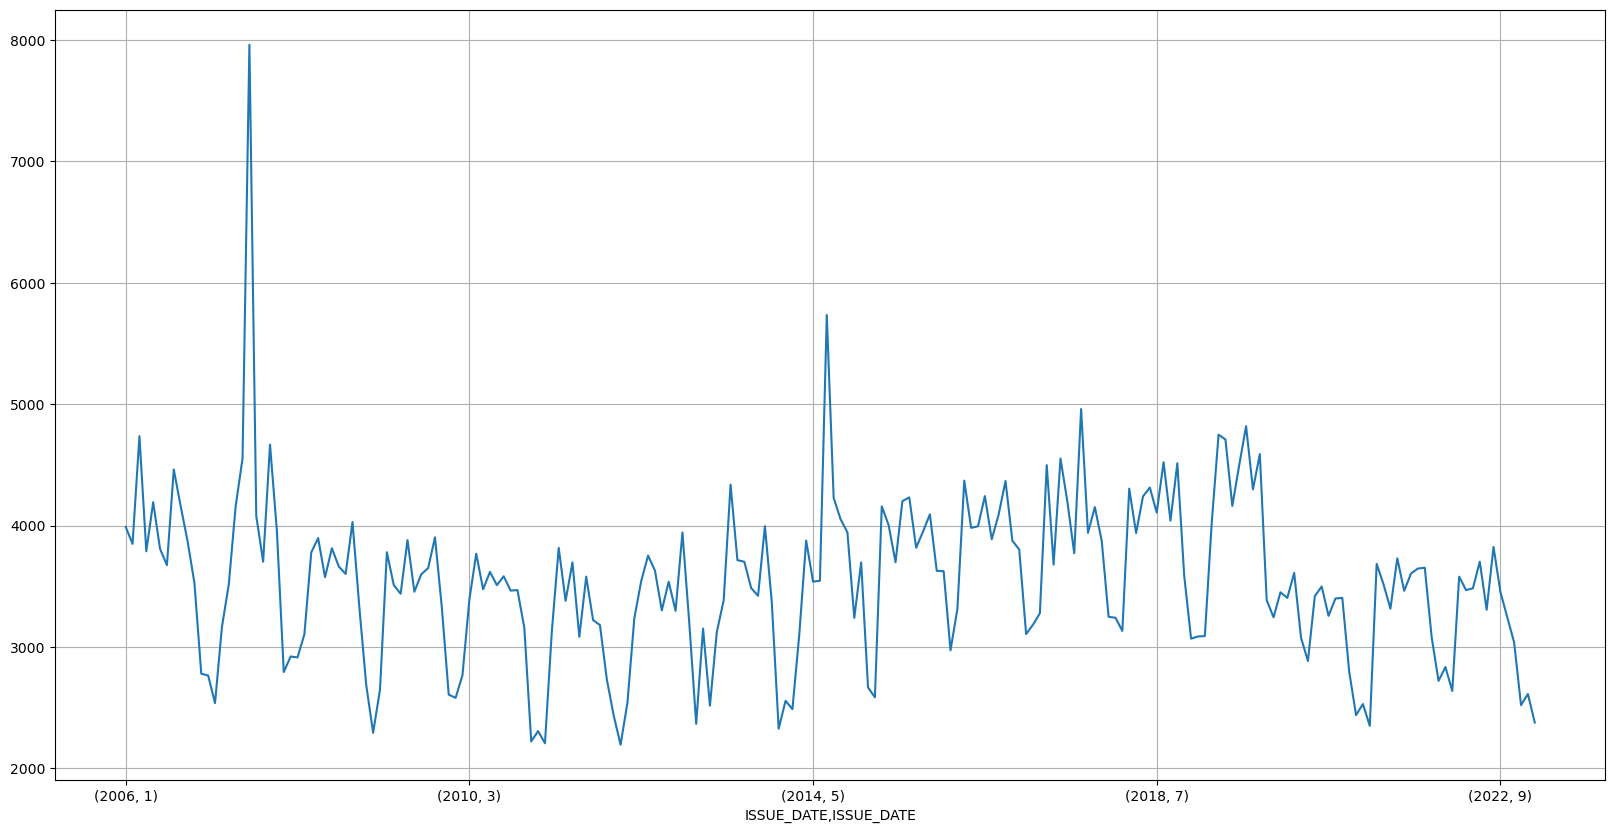

In [664]:
chicago_wip3.groupby([chicago_wip3['ISSUE_DATE'].dt.year,chicago_wip3['ISSUE_DATE'].dt.month]).count()['PERMIT_TYPE'].plot(figsize=(20,10),grid=True)

In [665]:
yearly_wards=chicago_wip3.groupby([chicago_wip3['ISSUE_DATE'].dt.year,'WARD']).count()['PERMIT_TYPE']

In [666]:
yearly_wards.unstack().T.isna().sum()

ISSUE_DATE
2006    47
2007    25
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
dtype: int64

Let's only consider data from 2008 onwards. The data before 2008 appears incomplete

In [667]:
[chicago_wip3['ISSUE_DATE'].dt.year>=2008]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 730506     True
 730507     True
 730508     True
 730509     True
 730510     True
 Name: ISSUE_DATE, Length: 730511, dtype: bool]

In [668]:
chicago_wip4=chicago_wip3[chicago_wip3['ISSUE_DATE'].dt.year>=2008]

In [669]:
chicago_wip4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635827 entries, 20 to 730510
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   PERMIT_TYPE             635827 non-null  object        
 1   REVIEW_TYPE             635820 non-null  object        
 2   APPLICATION_START_DATE  635664 non-null  datetime64[ns]
 3   ISSUE_DATE              635827 non-null  datetime64[ns]
 4   PROCESSING_TIME         635664 non-null  float64       
 5   STREET_NUMBER           635827 non-null  int64         
 6   WORK_DESCRIPTION        635807 non-null  object        
 7   BUILDING_FEE_PAID       635827 non-null  float64       
 8   SUBTOTAL_PAID           635827 non-null  float64       
 9   SUBTOTAL_UNPAID         635827 non-null  float64       
 10  ZONING_FEE_WAIVED       635827 non-null  float64       
 11  TOTAL_FEE               635827 non-null  float64       
 12  CONTACT_1_TYPE          63273

In [841]:
chicago_wip4.nunique()

PERMIT_TYPE                   11
REVIEW_TYPE                   11
APPLICATION_START_DATE      6030
ISSUE_DATE                  5502
PROCESSING_TIME             1408
STREET_NUMBER              10546
WORK_DESCRIPTION          492558
BUILDING_FEE_PAID          42706
SUBTOTAL_PAID              46792
SUBTOTAL_UNPAID             1179
ZONING_FEE_WAIVED            123
TOTAL_FEE                  49062
CONTACT_1_TYPE                26
REPORTED_COST              42204
COMMUNITY_AREA                78
CENSUS_TRACT                1671
WARD                          50
LATITUDE                  219246
LONGITUDE                 219218
dtype: int64

In [863]:
chicago_wip4['CENSUS_TRACT']

20             NaN
32        611900.0
33        830600.0
34        170600.0
46        100500.0
            ...   
730506    650500.0
730507    220400.0
730508     81202.0
730509    837300.0
730510    530503.0
Name: CENSUS_TRACT, Length: 635827, dtype: float64

## High Level Overview

In [670]:
yearly_wards=chicago_wip4.groupby([(chicago_wip4['ISSUE_DATE']).dt.year,'WARD']).count()['PERMIT_TYPE']

<AxesSubplot:title={'center':'Total Number of Applications by Ward'}, xlabel='ISSUE_DATE'>

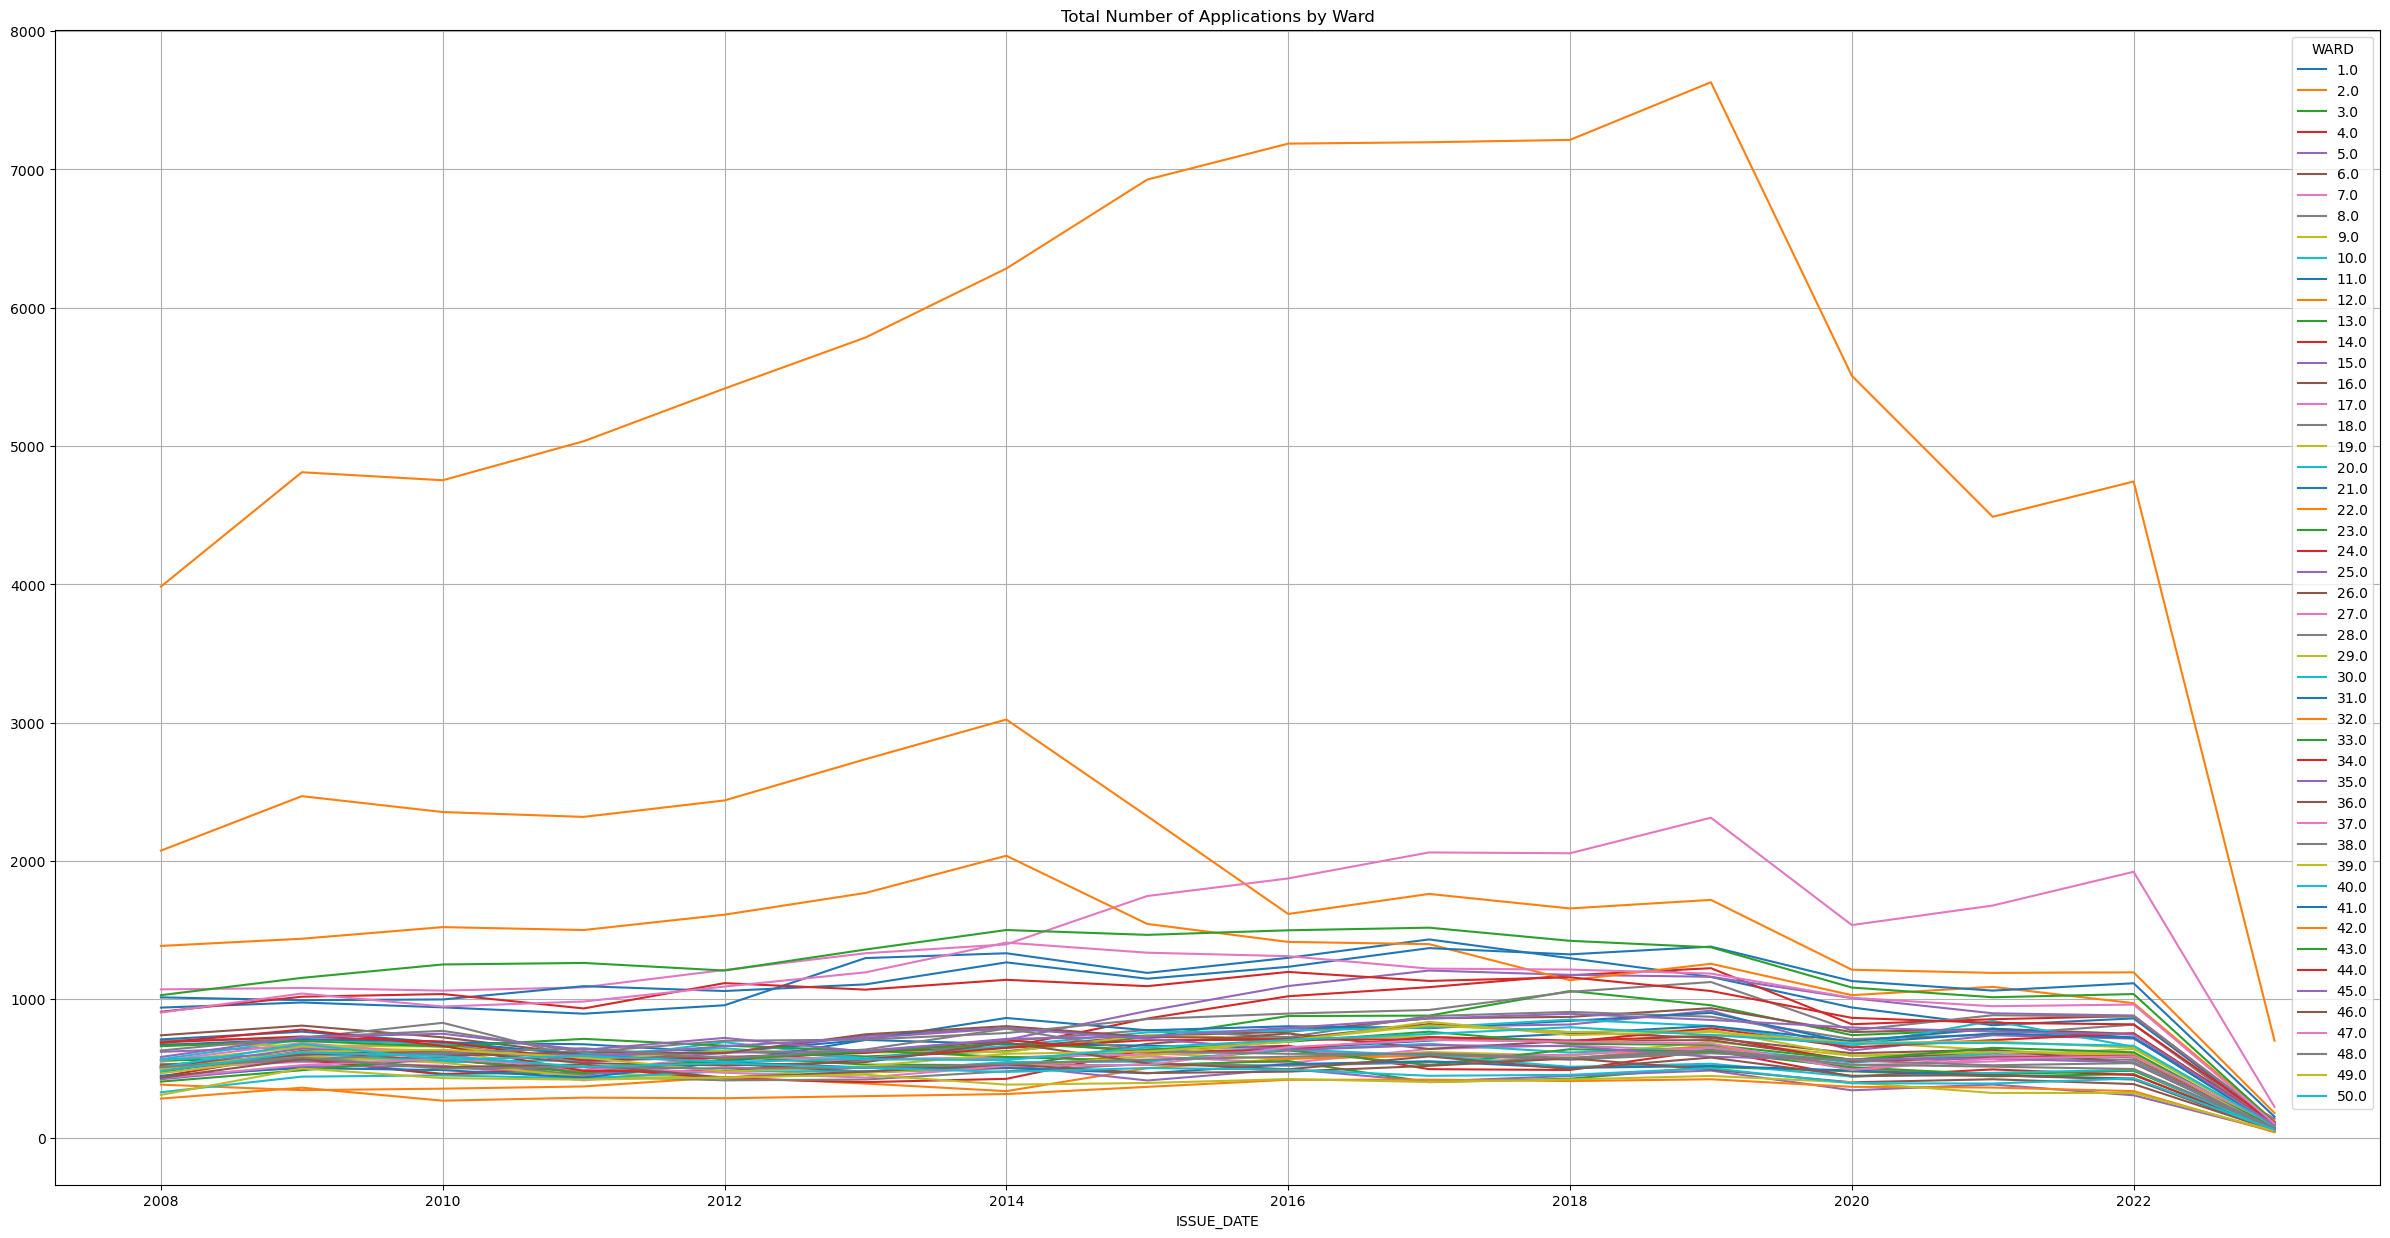

In [671]:
yearly_wards.unstack().plot(figsize=(30,15),grid=True,title='Total Number of Applications by Ward')

In [672]:
reported_cost_wards_total=chicago_wip4.groupby([chicago_wip3['ISSUE_DATE'].dt.year,'WARD'])['REPORTED_COST'].sum()

In [673]:
reported_cost_wards=chicago_wip4.groupby([chicago_wip3['ISSUE_DATE'].dt.year,'WARD'])['REPORTED_COST'].sum()/chicago_wip4.groupby([chicago_wip3['ISSUE_DATE'].dt.year,'WARD'])['REPORTED_COST'].count()

<AxesSubplot:title={'center':'AVG reported cost per application by ward'}, xlabel='ISSUE_DATE'>

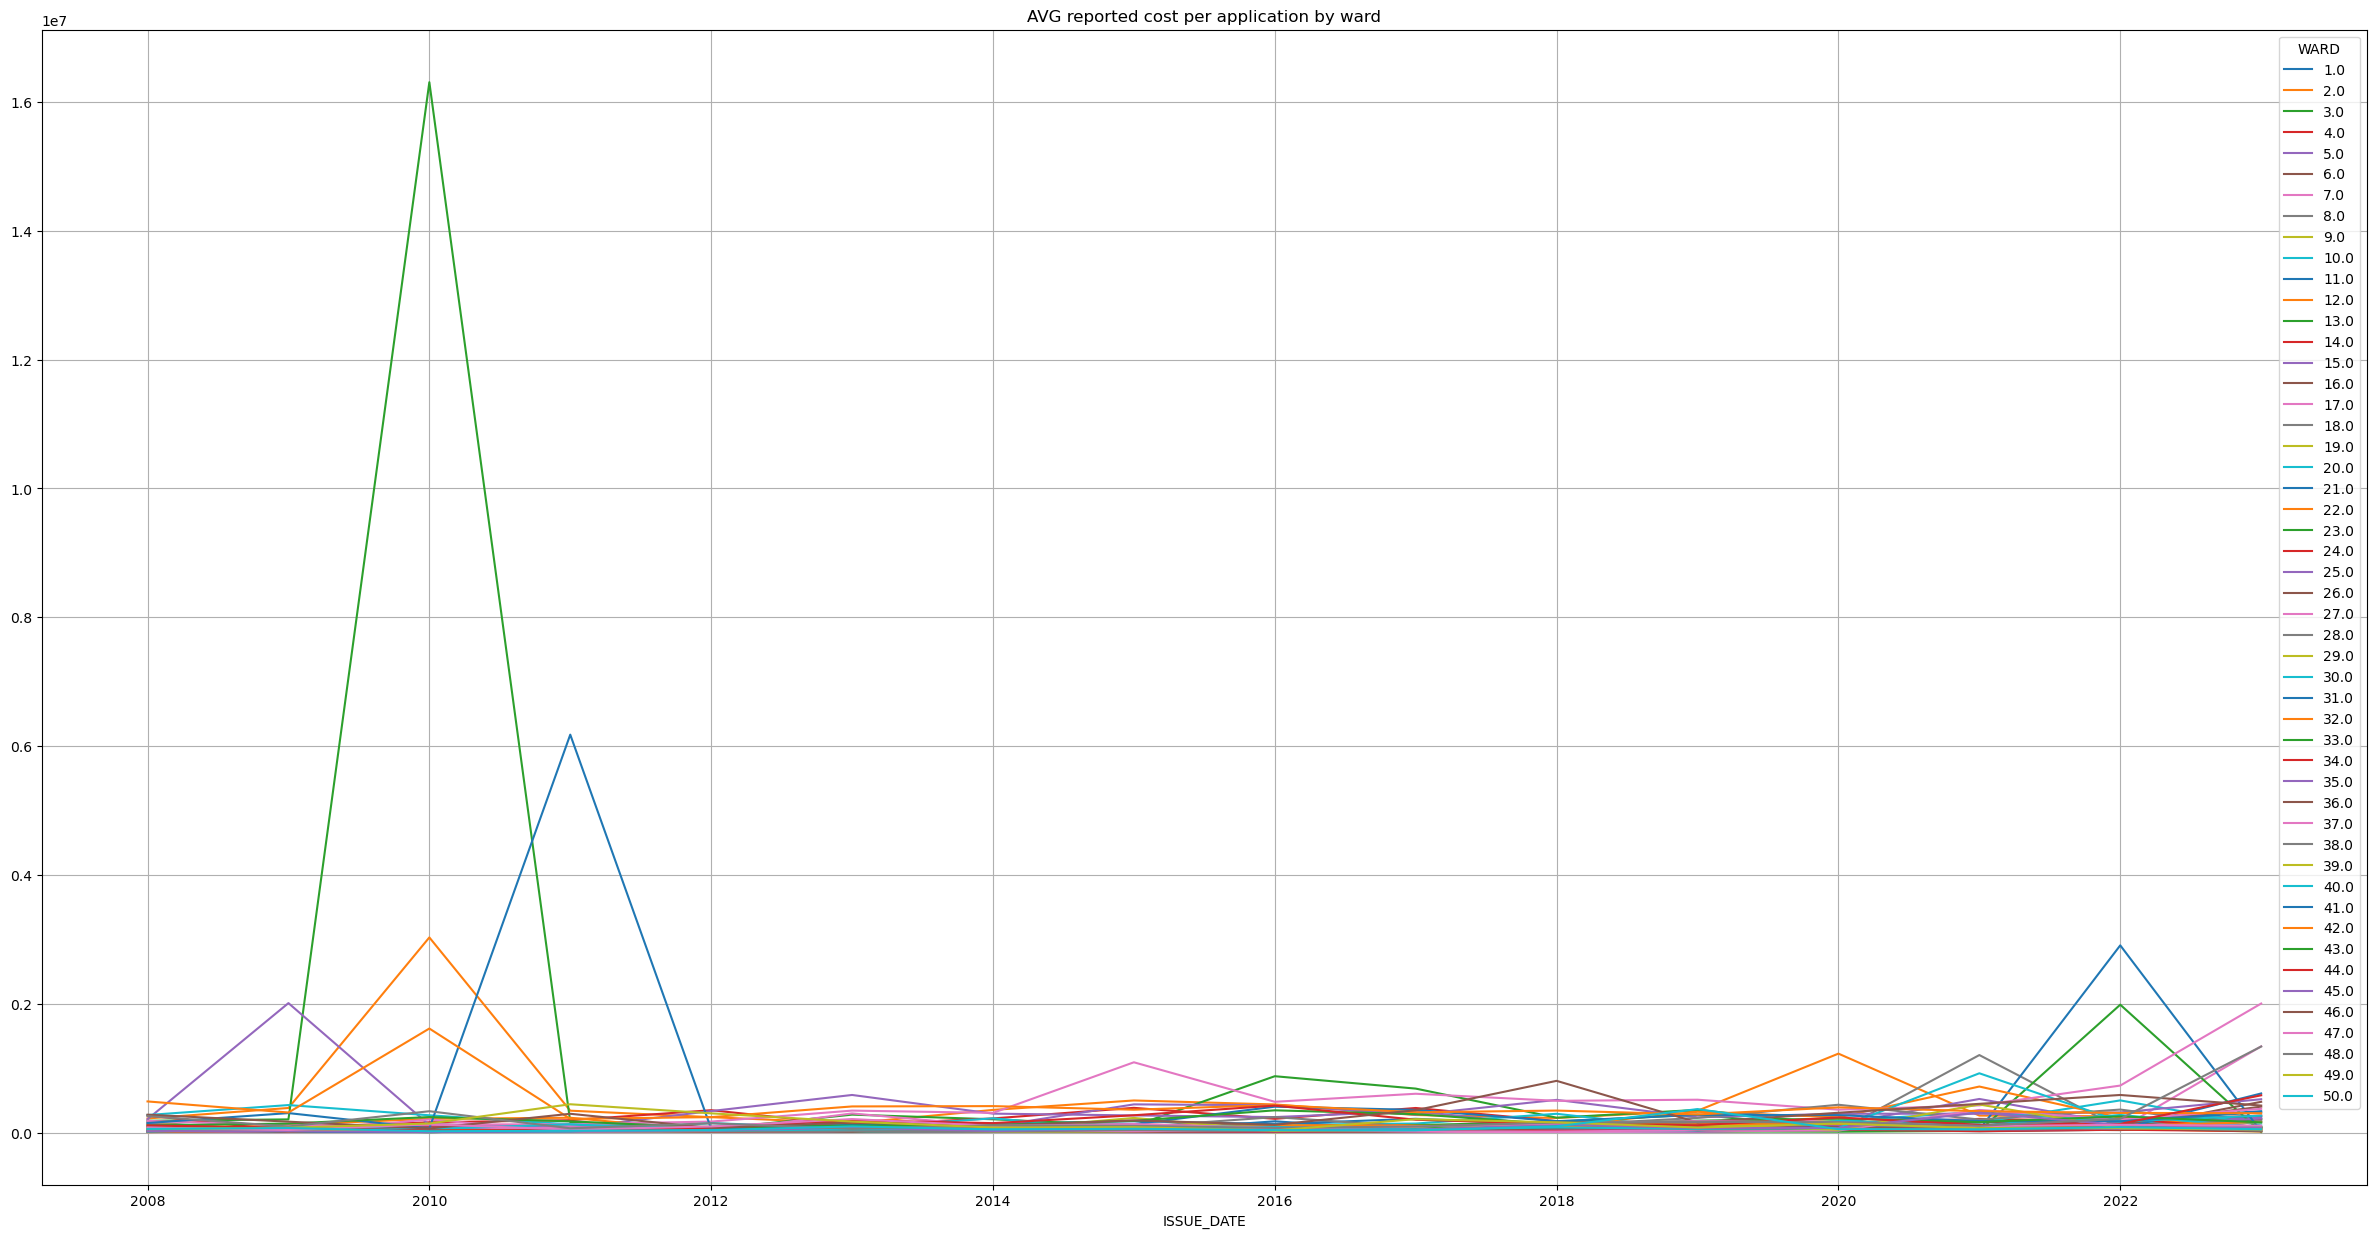

In [674]:
reported_cost_wards.unstack().plot(figsize=(30,15), grid=True, title='AVG reported cost per application by ward')

In [675]:
reported_cost_community=chicago_wip4.groupby([chicago_wip3['ISSUE_DATE'].dt.year,'COMMUNITY_AREA'])['REPORTED_COST'].sum()/chicago_wip4.groupby([chicago_wip3['ISSUE_DATE'].dt.year,'COMMUNITY_AREA'])['REPORTED_COST'].count()

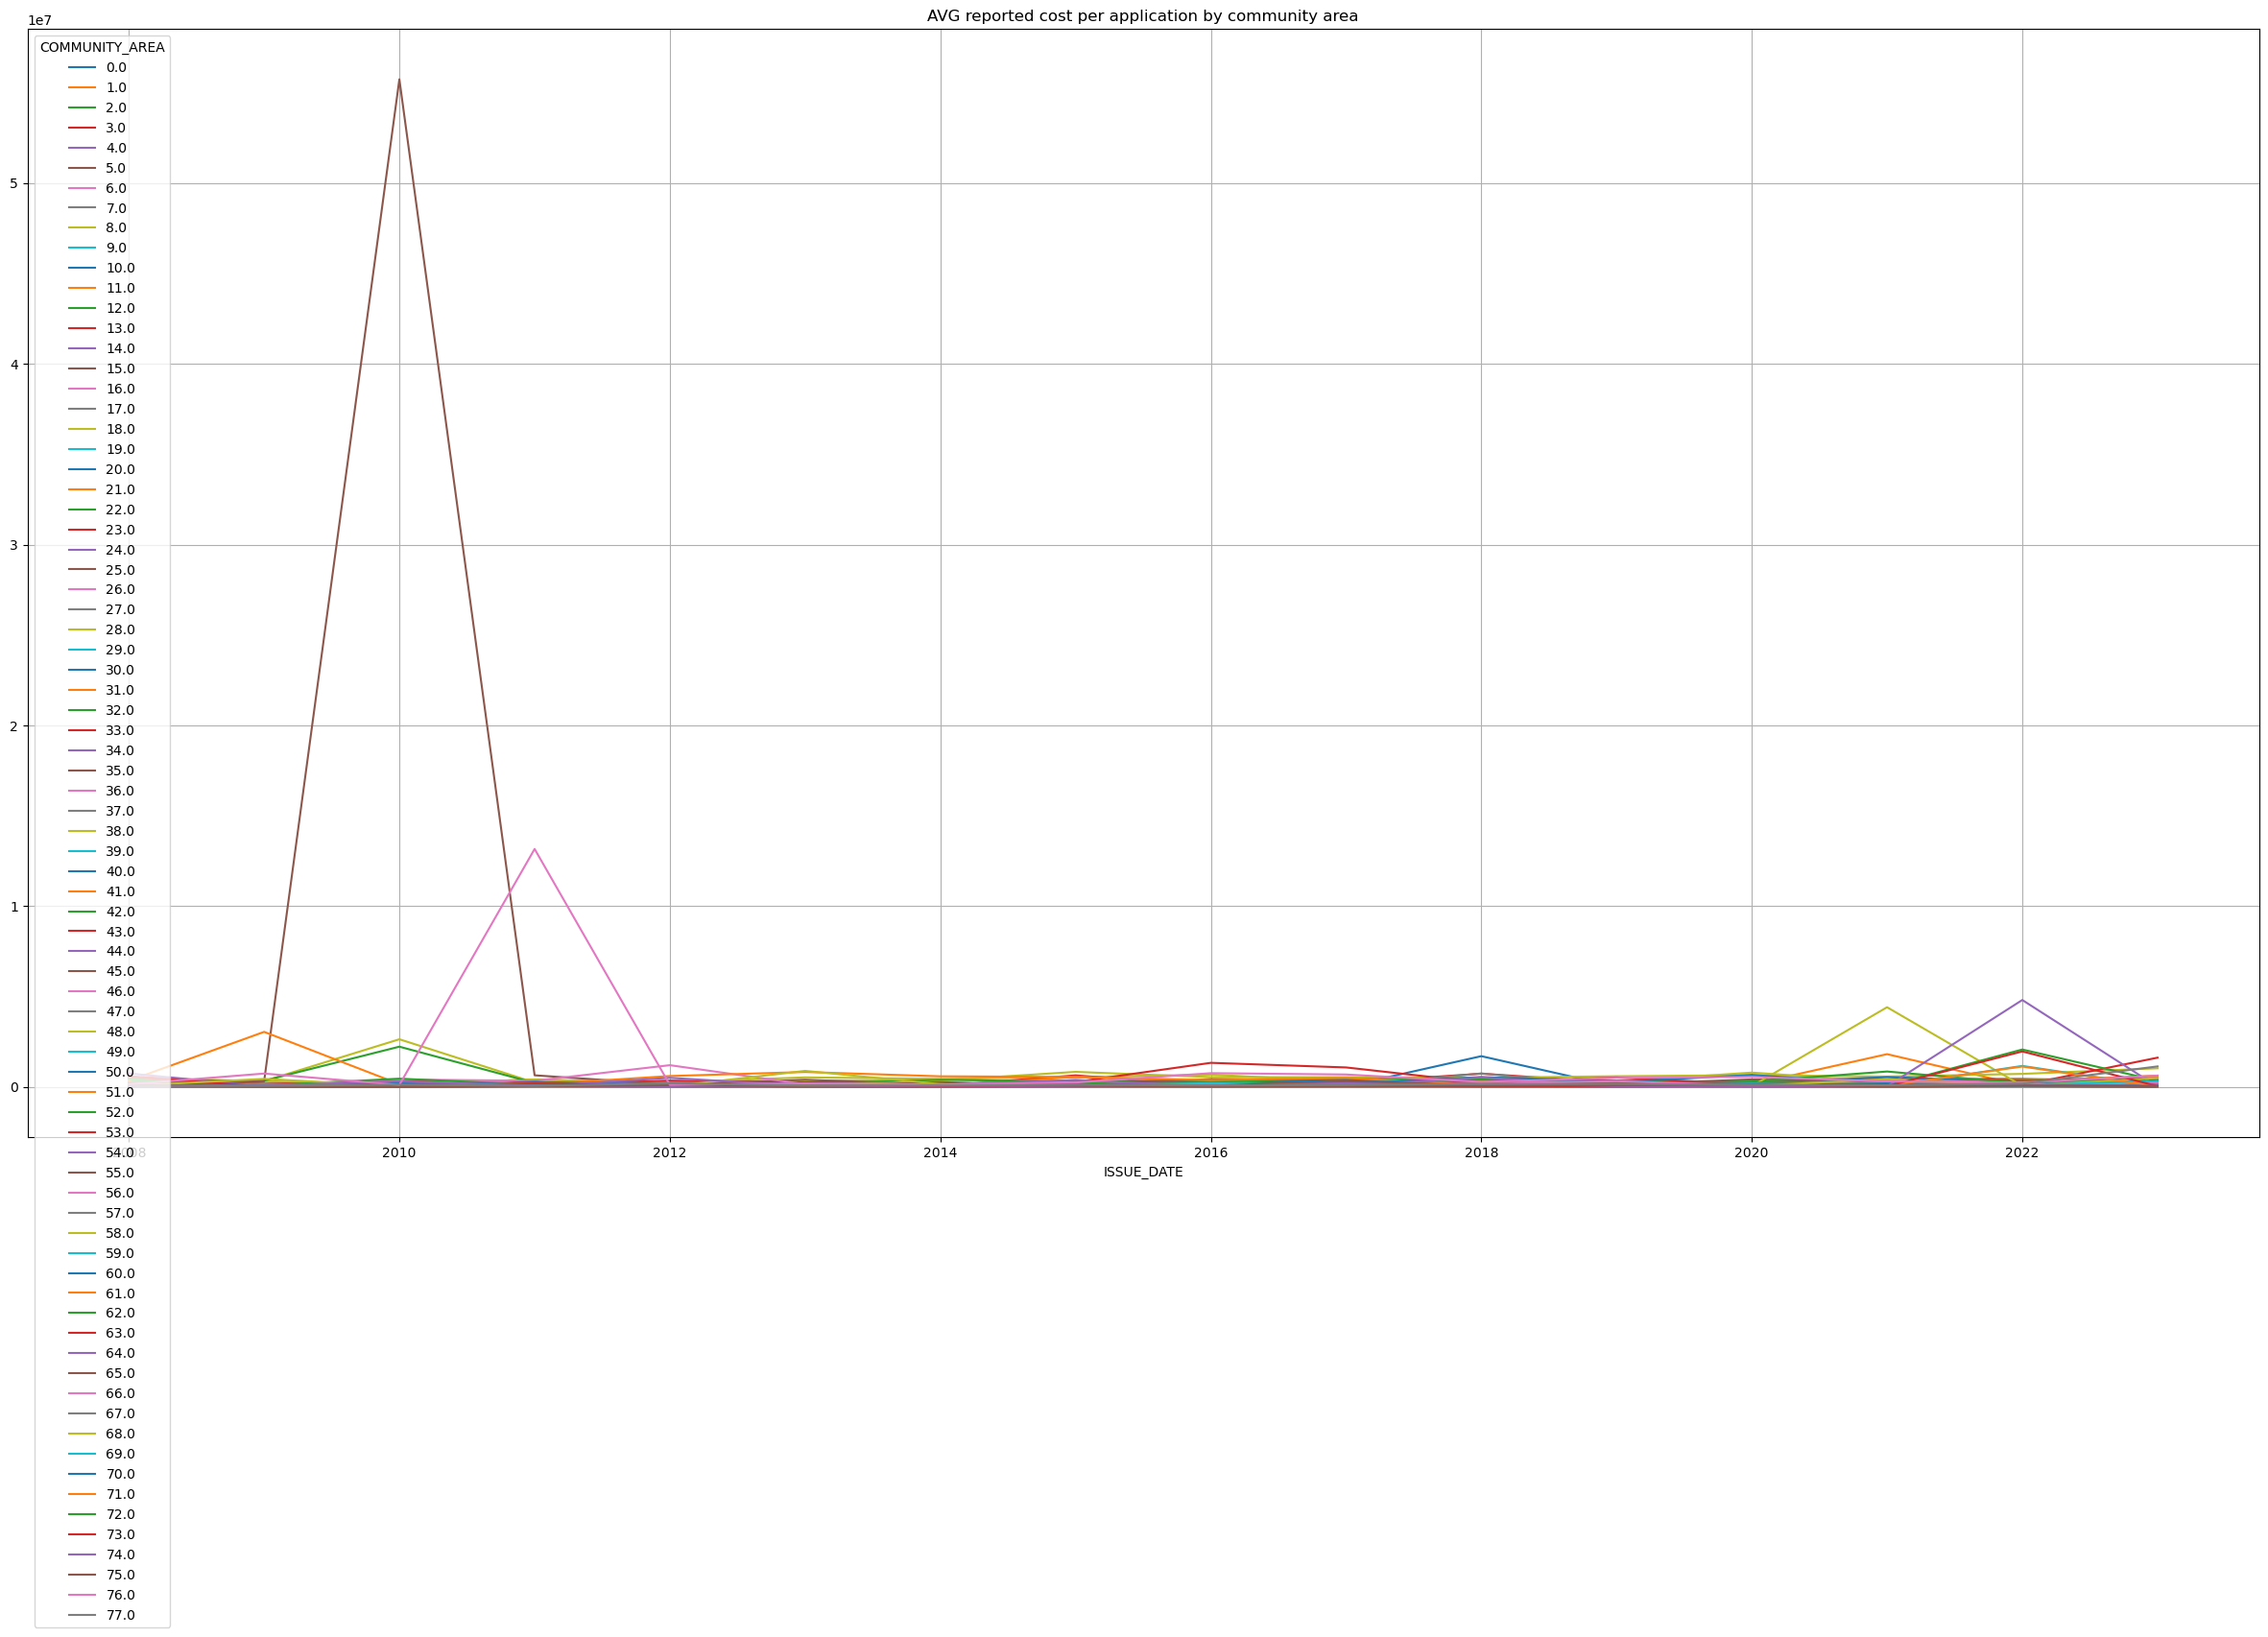

In [676]:
reported_cost_community.unstack().plot(figsize=(30,15), grid=True, title='AVG reported cost per application by community area');

In [677]:
#What types of Permit Types are there?
chicago_wip4['PERMIT_TYPE'].unique()

array(['PERMIT - SIGNS', 'PERMIT - WRECKING/DEMOLITION',
       'PERMIT - EASY PERMIT PROCESS', 'PERMIT - RENOVATION/ALTERATION',
       'PERMIT - ELECTRIC WIRING', 'PERMIT - NEW CONSTRUCTION',
       'PERMIT - ELEVATOR EQUIPMENT', 'PERMIT - REINSTATE REVOKED PMT',
       'PERMIT - SCAFFOLDING', 'PERMIT - FOR EXTENSION OF PMT',
       'PERMIT - PORCH CONSTRUCTION'], dtype=object)

<AxesSubplot:xlabel='PERMIT_TYPE'>

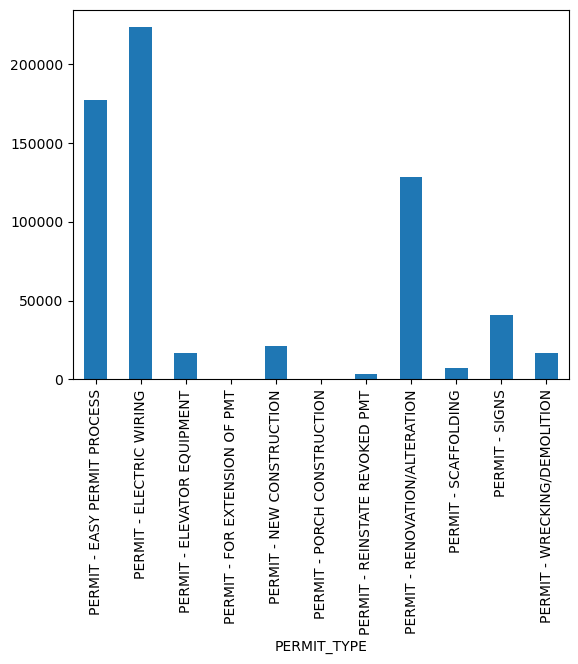

In [678]:
chicago_wip4.groupby('PERMIT_TYPE').count()['ISSUE_DATE'].plot(kind='bar')

In [679]:
#Can text processing be applied for this column to find any patterns/ form clusters?
chicago_wip4['WORK_DESCRIPTION'].sample(20)

76774            HOT WATER HEATER (REPLACEMENT ONLY): QTY 1
454393           REPLACE WIRING, OUTLETS AND LIGHT FIXTURES
427136    REPLACEMENT OF FRONT WOOD PORCH IN SAME LOCATI...
86309     REPLACE 5 EXISTING GLASS BLOCK. REPAIR CONCRET...
183000              INSTALLATION OF ELECTRICAL TIMER SWITCH
81463                    INSTALL LOW VOLTAGE BURGLAR ALARM.
325615    SELF CERT: INTERIOR ALTERATIONS TO 32ND FLOOR ...
76703                                                GARAGE
484130                                               GARAGE
533248    ADDRESS CODE VIOLATIONS ALL NEW DRYWALL EW FIX...
637941                     INSTALL LOW VOLTAGE SOUND SYSTEM
170057    INSTALLATION OF LOW VOLTAGE BURGLAR ALARM # 34...
270098    SEPTEMBER MAINTENANCE/COMPUTER/PHONE/WIRELESS ...
287470    ALTERATIONS TO FIRST FLOOR TENANT LOBBY AND 5T...
60886         INTERIOR RENOVATION AND REAR 2 STORY ADDITION
174204    CONCRETE PATCHING & REPAIRS AT GRADE LEVEL BUI...
611780    All Elevation, repair/replace 

## How can we divide the data geographically?

**Option 1: Great (but would require linking it to US Census Database)**

[Defintion] Census Tracts are small, relatively permanent statistical subdivisions of a county or statistically equivalent entity that can be updated by local participants prior to each decennial census as part of the Census Bureau's Participant Statistical Areas Program (PSAP)
https://www.census.gov/programs-surveys/geography/about/glossary.html#:~:text=Census%20Tracts%20are%20small%2C%20relatively,Statistical%20Areas%20Program%20(PSAP).

**Option 2: Divide by WARD or COMMUNITY_AREA**

In [680]:
chicago_wip4['WARD'].unique()

array([nan, 20., 40., 38., 41., 24., 23., 29., 11., 46.,  8., 15., 42.,
       43.,  2., 45., 27., 25., 39., 48.,  1., 44.,  7.,  6., 14., 37.,
       32.,  4., 35., 21., 10., 50., 33., 22., 47., 26.,  9.,  5., 34.,
       19., 12., 17., 13., 18.,  3., 31., 28., 49., 36., 30., 16.])

In [681]:
chicago_wip4['COMMUNITY_AREA'].unique()

array([nan, 61.,  1., 17., 10., 29., 76., 65., 15., 25.,  3., 43., 66.,
        8., 28., 33., 34., 13., 16., 77., 24., 32., 57.,  6., 69., 58.,
       22., 21., 71., 46.,  2., 14., 51., 11.,  5., 20., 53., 44.,  7.,
       30., 60., 75., 12., 64., 72., 63., 48., 73., 70., 59., 37., 56.,
        4., 39., 35., 49., 42., 23., 27., 19., 45., 50., 74., 68.,  0.,
       52., 31., 67., 55., 41., 47.,  9., 18., 26., 62., 38., 40., 54.,
       36.])

**Ultimately, the gropgraphic division will depend on the structure of the target variable dataset**

Let's load out current target variable dataset.

In [682]:
prices_df_raw=pd.read_csv('../src/data/Chicago_price_index_data.csv')

In [683]:
prices_df_raw.head();

In [684]:
#let's drop unnecessary columns
prices_df_wip=prices_df.drop(columns=['COOK','SUBURBS'])
prices_df_wip.head()

YEARQ  CHICAGO  Palatine/Barrington  Melrose Park/Maywood  \
0  1997Q1    80.51                88.45                 90.59   
1  1997Q2    81.74                88.13                 90.05   
2  1997Q3    83.66                88.66                 90.26   
3  1997Q4    84.18                88.37                 91.27   
4  1998Q1    85.49                88.83                 90.71   

   Oak Park/Cicero  LaGrange/Burbank  Orland Park/Lemont  \
0            82.87             84.73               92.37   
1            85.86             87.83               91.98   
2            86.83             89.65               93.76   
3            86.14             90.78               94.15   
4            86.89             91.34               94.44   

   Oak Lawn/Blue Island  Oak Forest/Country Club Hills  Calumet City/Harvey  \
0                 92.80                          93.44                91.80   
1                 92.88                          94.72                93.23   
2                 93.68                          95.50                93.36   
3                 94.09                          95.47                93.54   
4                 94.40                          95.97                93.71   

   ...  Chicago--Logan Square/Avondale  Chicago--Humboldt Park/Garfield Park  \
0  ...                           70.60                                 82.13   
1  ...                           72.17                                 86.80   
2  ...                           73.73                                 92.90   
3  ...                           72.93                                 93.54   
4  ...                           74.22                                 95.94   

   Chicago--West Town/Near West Side  Chicago--Bridgeport/Brighton Park  \
0                              70.66                              79.70   
1                              70.21                              82.34   
2                              69.67                              86.17   
3                              68.52                              88.45   
4                              69.15                              91.34   

   Chicago--Gage Park/West Lawn  Chicago--Englewood/Greater Grand Crossing  \
0                         88.14                                      85.80   
1                         89.83                                      86.00   
2                         90.24                                      86.01   
3                         90.15                                      87.37   
4                         90.62                                      89.48   

   Chicago--Bronzeville/Hyde Park  Chicago--Beverly/Morgan Park  \
0                           61.49                         81.30   
1                           72.59                         85.60   
2                           76.99                         87.86   
3                           78.16                         89.31   
4                           85.44                         91.14   

   Chicago--Auburn Gresham/Chatham  Chicago--South Chicago/West Pullman  
0                            80.24                                84.16  
1                            84.36                                90.44  
2                            86.57                                90.62  
3                            87.62                                89.88  
4                            89.50                                90.64  

[5 rows x 35 columns]

Current dataset appears to be divided by COMMUNITY AREAS

In [685]:
year=[year_.split('Q')[0] for year_ in prices_df_wip['YEARQ']]
year=[int(y) for y in year]
prices_df_wip.insert(1,'YEAR',year)

In [686]:
quarter=[year_.split('Q')[1] for year_ in prices_df_wip['YEARQ']]
quarter=[int(q) for q in quarter]
prices_df_wip.insert(2,'QUARTER',quarter)

In [687]:
prices_df_wip.head();

In [688]:
prices_df_wip2=prices_df_wip[prices_df_wip['YEAR']>=2008]

In [689]:
prices_df_wip3=prices_df_wip2.drop(columns='YEARQ')

In [690]:
prices_df_wip3.columns[3:]

Index(['Palatine/Barrington', 'Melrose Park/Maywood', 'Oak Park/Cicero',
       'LaGrange/Burbank', 'Orland Park/Lemont', 'Oak Lawn/Blue Island',
       'Oak Forest/Country Club Hills', 'Calumet City/Harvey',
       'Chicago Heights/Park Forest', 'Arlington Heights/Wheeling',
       'Winnetka/Northbrook', 'Hoffman Estates/Streamwood', 'Schaumburg',
       'Mount Prospect/Elk Grove Village', 'Park Ridge/Des Plaines',
       'Evanston/Skokie', 'Elmwood Park/Franklin Park',
       'Chicago--Uptown/Rogers Park', 'Chicago--Lake View/Lincoln Park',
       'Chicago--Lincoln Square/North Center',
       'Chicago--Irving Park/Albany Park',
       'Chicago--Portage Park/Jefferson Park',
       'Chicago--Austin/Belmont Cragin', 'Chicago--Logan Square/Avondale',
       'Chicago--Humboldt Park/Garfield Park',
       'Chicago--West Town/Near West Side',
       'Chicago--Bridgeport/Brighton Park', 'Chicago--Gage Park/West Lawn',
       'Chicago--Englewood/Greater Grand Crossing',
       'Chicago--Bro

In [691]:
#Let's select neighbourhood names NOT starting with Chicago
non_chicago=[name for name in prices_df_wip3.columns[3:] if name[0:7]!='Chicago']
non_chicago

['Palatine/Barrington',
 'Melrose Park/Maywood',
 'Oak Park/Cicero',
 'LaGrange/Burbank',
 'Orland Park/Lemont',
 'Oak Lawn/Blue Island',
 'Oak Forest/Country Club Hills',
 'Calumet City/Harvey',
 'Arlington Heights/Wheeling',
 'Winnetka/Northbrook',
 'Hoffman Estates/Streamwood',
 'Schaumburg',
 'Mount Prospect/Elk Grove Village',
 'Park Ridge/Des Plaines',
 'Evanston/Skokie',
 'Elmwood Park/Franklin Park']

In [692]:
prices_df_wip4=prices_df_wip3.drop(columns=non_chicago)

We need to assign a Community Area number to each column to be able to match it with the main (permit applications) dataset

In [693]:
prices_df_wip4.head()

YEAR  QUARTER  CHICAGO  Chicago Heights/Park Forest  \
44  2008        1   199.90                       155.62   
45  2008        2   194.15                       148.34   
46  2008        3   185.49                       140.11   
47  2008        4   177.70                       133.30   
48  2009        1   168.42                       123.70   

    Chicago--Uptown/Rogers Park  Chicago--Lake View/Lincoln Park  \
44                       186.57                           169.84   
45                       185.11                           173.84   
46                       173.78                           169.24   
47                       177.28                           165.41   
48                       172.92                           165.58   

    Chicago--Lincoln Square/North Center  Chicago--Irving Park/Albany Park  \
44                                202.53                            189.77   
45                                199.33                            185.57   
46                                192.16                            178.29   
47                                188.11                            173.33   
48                                183.28                            168.44   

    Chicago--Portage Park/Jefferson Park  Chicago--Austin/Belmont Cragin  \
44                                186.95                          215.63   
45                                179.89                          208.45   
46                                170.94                          195.23   
47                                164.78                          177.94   
48                                161.09                          163.10   

    Chicago--Logan Square/Avondale  Chicago--Humboldt Park/Garfield Park  \
44                          218.86                                278.41   
45                          219.68                                262.04   
46                          219.40                                232.32   
47                          213.48                                198.29   
48                          207.91                                170.17   

    Chicago--West Town/Near West Side  Chicago--Bridgeport/Brighton Park  \
44                             227.74                             234.84   
45                             225.33                             229.64   
46                             225.68                             222.22   
47                             223.29                             217.12   
48                             215.20                             202.45   

    Chicago--Gage Park/West Lawn  Chicago--Englewood/Greater Grand Crossing  \
44                        201.88                                     242.33   
45                        194.27                                     231.29   
46                        184.73                                     213.16   
47                        175.37                                     202.28   
48                        166.22                                     175.62   

    Chicago--Bronzeville/Hyde Park  Chicago--Beverly/Morgan Park  \
44                          239.50                        186.94   
45                          233.37                        179.23   
46                          216.28                        172.93   
47                          198.29                        165.64   
48                          182.58                        157.68   

    Chicago--Auburn Gresham/Chatham  Chicago--South Chicago/West Pullman  
44                           187.41                               187.56  
45                           183.09                               182.65  
46                           176.09                               171.06  
47                           169.20                               164.49  
48                           158.34                               157.86

In [694]:
prices_df_wip4.reset_index(inplace=True)

In [695]:
prices_df_wip5=prices_df_wip4.drop(columns=['index','Chicago Heights/Park Forest'])

Need to assign the community area number to each column

In [696]:
prices_df_wip5.head()

YEAR  QUARTER  CHICAGO  Chicago--Uptown/Rogers Park  \
0  2008        1   199.90                       186.57   
1  2008        2   194.15                       185.11   
2  2008        3   185.49                       173.78   
3  2008        4   177.70                       177.28   
4  2009        1   168.42                       172.92   

   Chicago--Lake View/Lincoln Park  Chicago--Lincoln Square/North Center  \
0                           169.84                                202.53   
1                           173.84                                199.33   
2                           169.24                                192.16   
3                           165.41                                188.11   
4                           165.58                                183.28   

   Chicago--Irving Park/Albany Park  Chicago--Portage Park/Jefferson Park  \
0                            189.77                                186.95   
1                            185.57                                179.89   
2                            178.29                                170.94   
3                            173.33                                164.78   
4                            168.44                                161.09   

   Chicago--Austin/Belmont Cragin  Chicago--Logan Square/Avondale  \
0                          215.63                          218.86   
1                          208.45                          219.68   
2                          195.23                          219.40   
3                          177.94                          213.48   
4                          163.10                          207.91   

   Chicago--Humboldt Park/Garfield Park  Chicago--West Town/Near West Side  \
0                                278.41                             227.74   
1                                262.04                             225.33   
2                                232.32                             225.68   
3                                198.29                             223.29   
4                                170.17                             215.20   

   Chicago--Bridgeport/Brighton Park  Chicago--Gage Park/West Lawn  \
0                             234.84                        201.88   
1                             229.64                        194.27   
2                             222.22                        184.73   
3                             217.12                        175.37   
4                             202.45                        166.22   

   Chicago--Englewood/Greater Grand Crossing  Chicago--Bronzeville/Hyde Park  \
0                                     242.33                          239.50   
1                                     231.29                          233.37   
2                                     213.16                          216.28   
3                                     202.28                          198.29   
4                                     175.62                          182.58   

   Chicago--Beverly/Morgan Park  Chicago--Auburn Gresham/Chatham  \
0                        186.94                           187.41   
1                        179.23                           183.09   
2                        172.93                           176.09   
3                        165.64                           169.20   
4                        157.68                           158.34   

   Chicago--South Chicago/West Pullman  
0                               187.56  
1                               182.65  
2                               171.06  
3                               164.49  
4                               157.86

In [697]:
#for each column name [1] store the series, [2] 

In [698]:
di={col:col.split('--')[1] for col in prices_df_wip5.columns[3:]}
di;

In [699]:
prices_df_wip6=prices_df_wip5.rename(columns=di)

In [700]:
prices_df_wip6.head()

YEAR  QUARTER  CHICAGO  Uptown/Rogers Park  Lake View/Lincoln Park  \
0  2008        1   199.90              186.57                  169.84   
1  2008        2   194.15              185.11                  173.84   
2  2008        3   185.49              173.78                  169.24   
3  2008        4   177.70              177.28                  165.41   
4  2009        1   168.42              172.92                  165.58   

   Lincoln Square/North Center  Irving Park/Albany Park  \
0                       202.53                   189.77   
1                       199.33                   185.57   
2                       192.16                   178.29   
3                       188.11                   173.33   
4                       183.28                   168.44   

   Portage Park/Jefferson Park  Austin/Belmont Cragin  Logan Square/Avondale  \
0                       186.95                 215.63                 218.86   
1                       179.89                 208.45                 219.68   
2                       170.94                 195.23                 219.40   
3                       164.78                 177.94                 213.48   
4                       161.09                 163.10                 207.91   

   Humboldt Park/Garfield Park  West Town/Near West Side  \
0                       278.41                    227.74   
1                       262.04                    225.33   
2                       232.32                    225.68   
3                       198.29                    223.29   
4                       170.17                    215.20   

   Bridgeport/Brighton Park  Gage Park/West Lawn  \
0                    234.84               201.88   
1                    229.64               194.27   
2                    222.22               184.73   
3                    217.12               175.37   
4                    202.45               166.22   

   Englewood/Greater Grand Crossing  Bronzeville/Hyde Park  \
0                            242.33                 239.50   
1                            231.29                 233.37   
2                            213.16                 216.28   
3                            202.28                 198.29   
4                            175.62                 182.58   

   Beverly/Morgan Park  Auburn Gresham/Chatham  South Chicago/West Pullman  
0               186.94                  187.41                      187.56  
1               179.23                  183.09                      182.65  
2               172.93                  176.09                      171.06  
3               165.64                  169.20                      164.49  
4               157.68                  158.34                      157.86

In [701]:
prices_df_wip7=prices_df_wip6.copy()
for col in prices_df_wip6.columns[3:]:
    temp=prices_df_wip6[col]
    prices_df_wip7[col.split('/')[0]]=temp
    prices_df_wip7[col.split('/')[1]]=temp
    prices_df_wip7=prices_df_wip7.drop(columns=col)


In [702]:
prices_df_wip7.head(1)

YEAR  QUARTER  CHICAGO  Uptown  Rogers Park  Lake View  Lincoln Park  \
0  2008        1    199.9  186.57       186.57     169.84        169.84   

   Lincoln Square  North Center  Irving Park  ...  Englewood  \
0          202.53        202.53       189.77  ...     242.33   

   Greater Grand Crossing  Bronzeville  Hyde Park  Beverly  Morgan Park  \
0                  242.33        239.5      239.5   186.94       186.94   

   Auburn Gresham  Chatham  South Chicago  West Pullman  
0          187.41   187.41         187.56        187.56  

[1 rows x 35 columns]

In [703]:
prices_df_wip7.columns

Index(['YEAR', 'QUARTER', 'CHICAGO', 'Uptown', 'Rogers Park', 'Lake View',
       'Lincoln Park', 'Lincoln Square', 'North Center', 'Irving Park',
       'Albany Park', 'Portage Park', 'Jefferson Park', 'Austin',
       'Belmont Cragin', 'Logan Square', 'Avondale', 'Humboldt Park',
       'Garfield Park', 'West Town', 'Near West Side', 'Bridgeport',
       'Brighton Park', 'Gage Park', 'West Lawn', 'Englewood',
       'Greater Grand Crossing', 'Bronzeville', 'Hyde Park', 'Beverly',
       'Morgan Park', 'Auburn Gresham', 'Chatham', 'South Chicago',
       'West Pullman'],
      dtype='object')

In [704]:
map_dict ={'Uptown':3, 'Rogers Park':1,
       'Lake View':6, 'Lincoln Park':7, 'Lincoln Square':4, 'North Center':5,
       'Irving Park':16, 'Albany Park':14, 'Portage Park':15, 'Jefferson Park':11,
       'Austin':25, 'Belmont Cragin':19, 'Logan Square':22, 'Avondale':21, 'Humboldt Park':23,
       'Garfield Park':26, 'West Town':24, 'Near West Side':28, 'Bronzeville': 38, 'Bridgeport':60,
       'Brighton Park':58, 'Gage Park':63, 'West Lawn':65, 'Englewood':68,
       'Greater Grand Crossing':69, 'Hyde Park':41, 'Beverly':72,
       'Morgan Park':75, 'Auburn Gresham':71, 'Chatham':44, 'South Chicago':46,
       'West Pullman':53}

In [705]:
prices_df_wip8=prices_df_wip7.rename(columns=map_dict)

In [706]:
prices_df_wip8.columns

Index([   'YEAR', 'QUARTER', 'CHICAGO',         3,         1,         6,
               7,         4,         5,        16,        14,        15,
              11,        25,        19,        22,        21,        23,
              26,        24,        28,        60,        58,        63,
              65,        68,        69,        38,        41,        72,
              75,        71,        44,        46,        53],
      dtype='object')

In [707]:
#prices_df_wip9=prices_df_wip8.drop(columns=['Heights','Park Forest','Bronzeville'])

<AxesSubplot:xlabel='YEAR,QUARTER'>

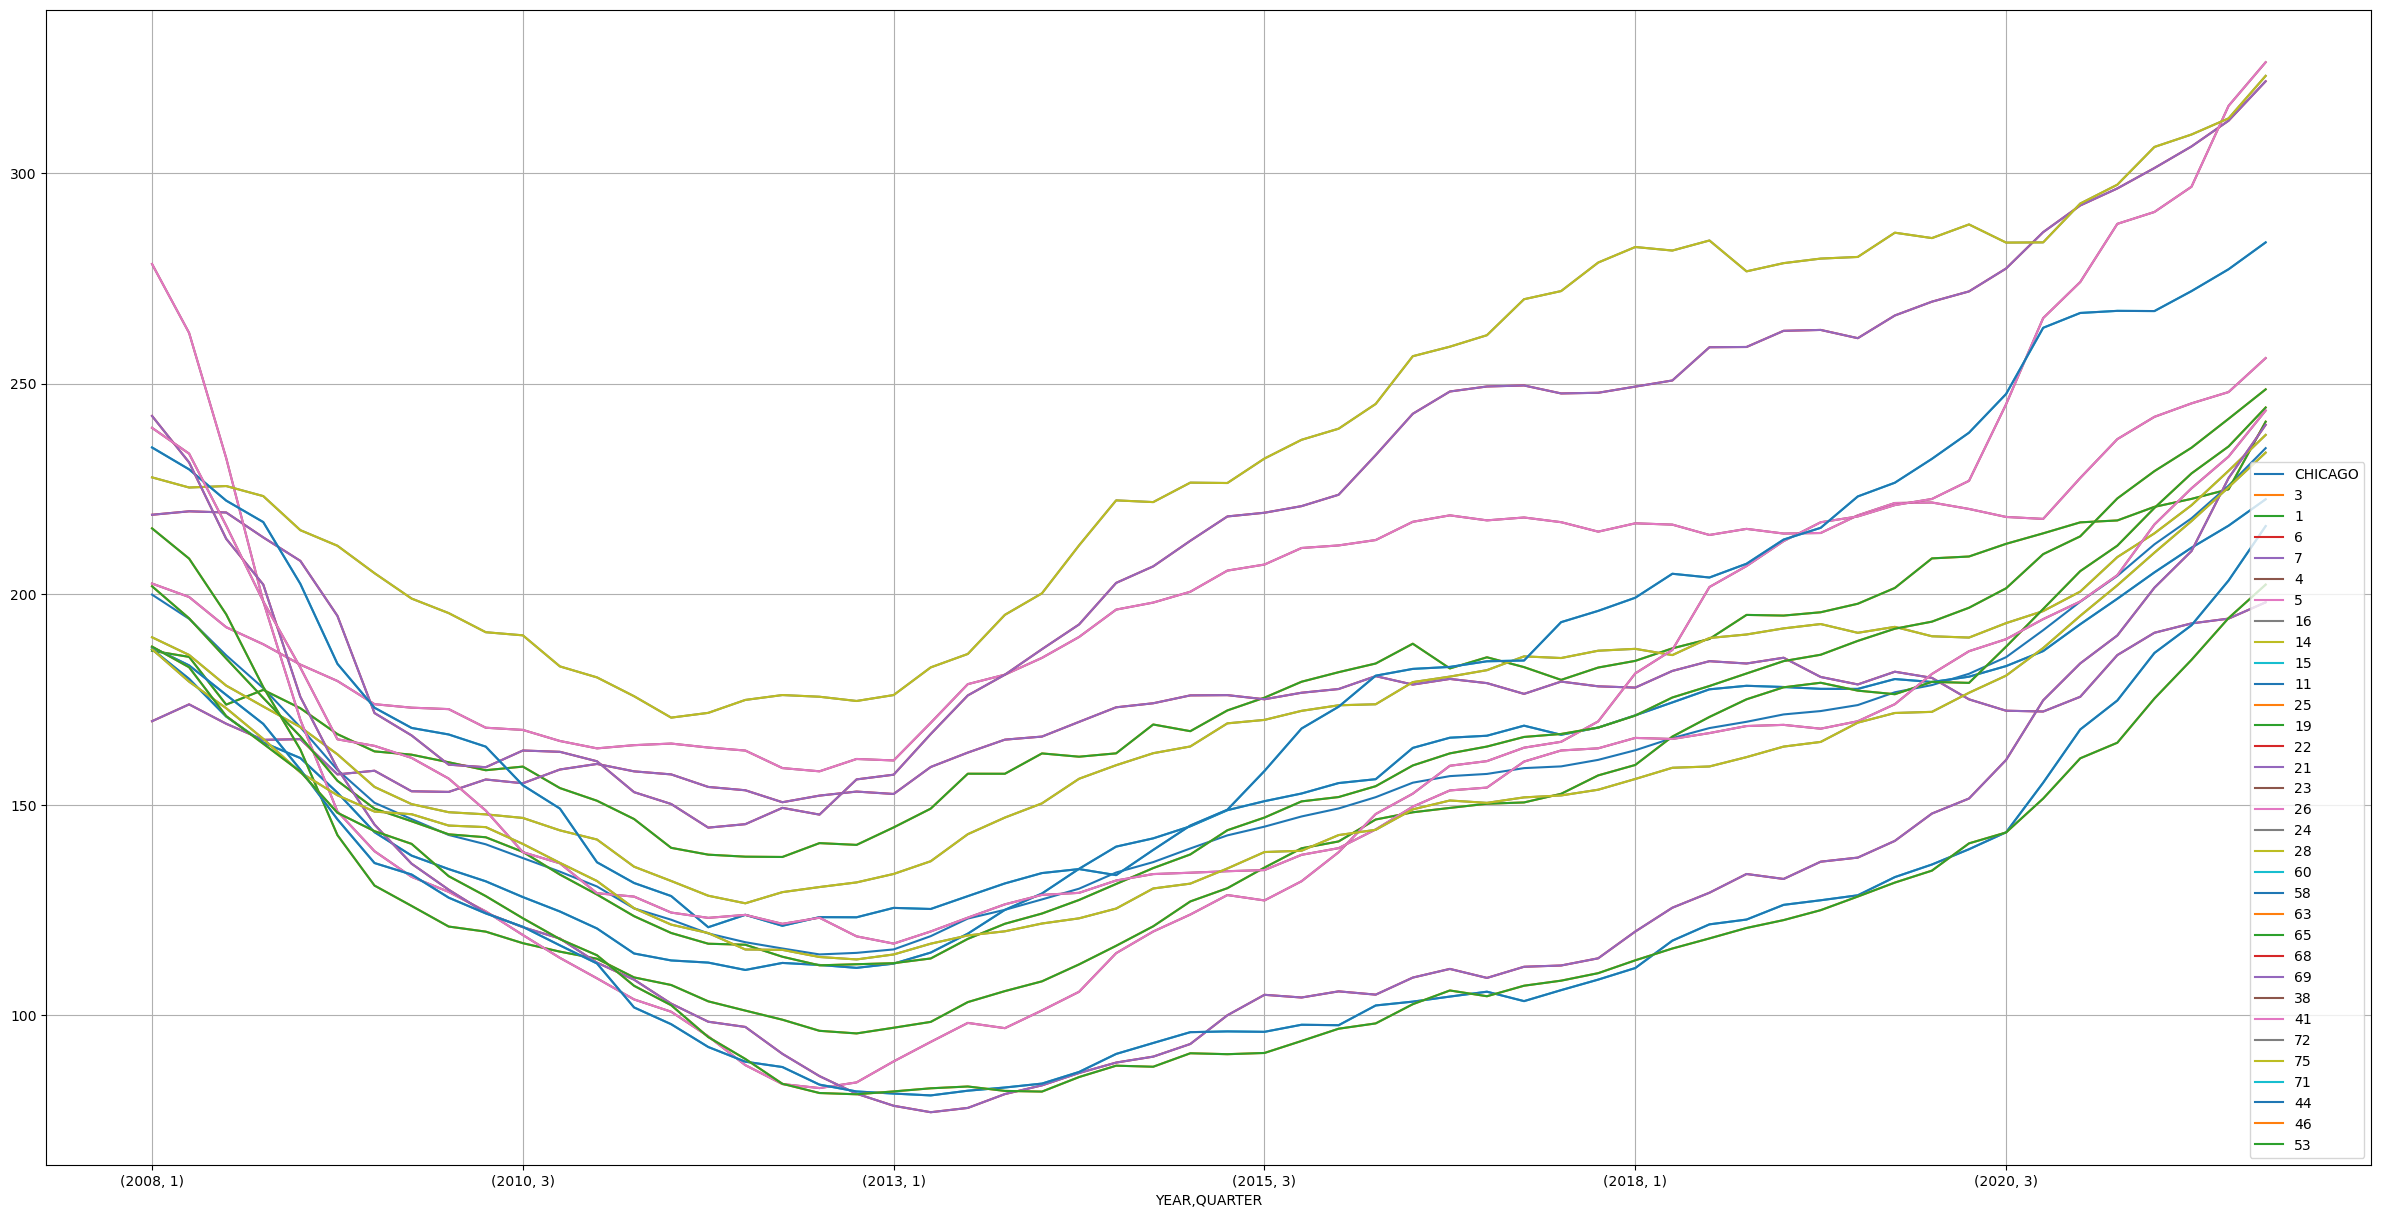

In [708]:
prices_df_wip8.groupby(['YEAR','QUARTER']).mean().plot(figsize=(30,15),grid=True)

In [752]:
areas=list(prices_df_wip8.columns)[3:]

In [710]:
reported_cost_community2=chicago_wip4.groupby([chicago_wip4['ISSUE_DATE'].dt.year,chicago_wip4['ISSUE_DATE'].dt.quarter,'COMMUNITY_AREA'])['REPORTED_COST'].sum()/chicago_wip4.groupby([chicago_wip3['ISSUE_DATE'].dt.year,chicago_wip4['ISSUE_DATE'].dt.quarter,'COMMUNITY_AREA'])['REPORTED_COST'].count()

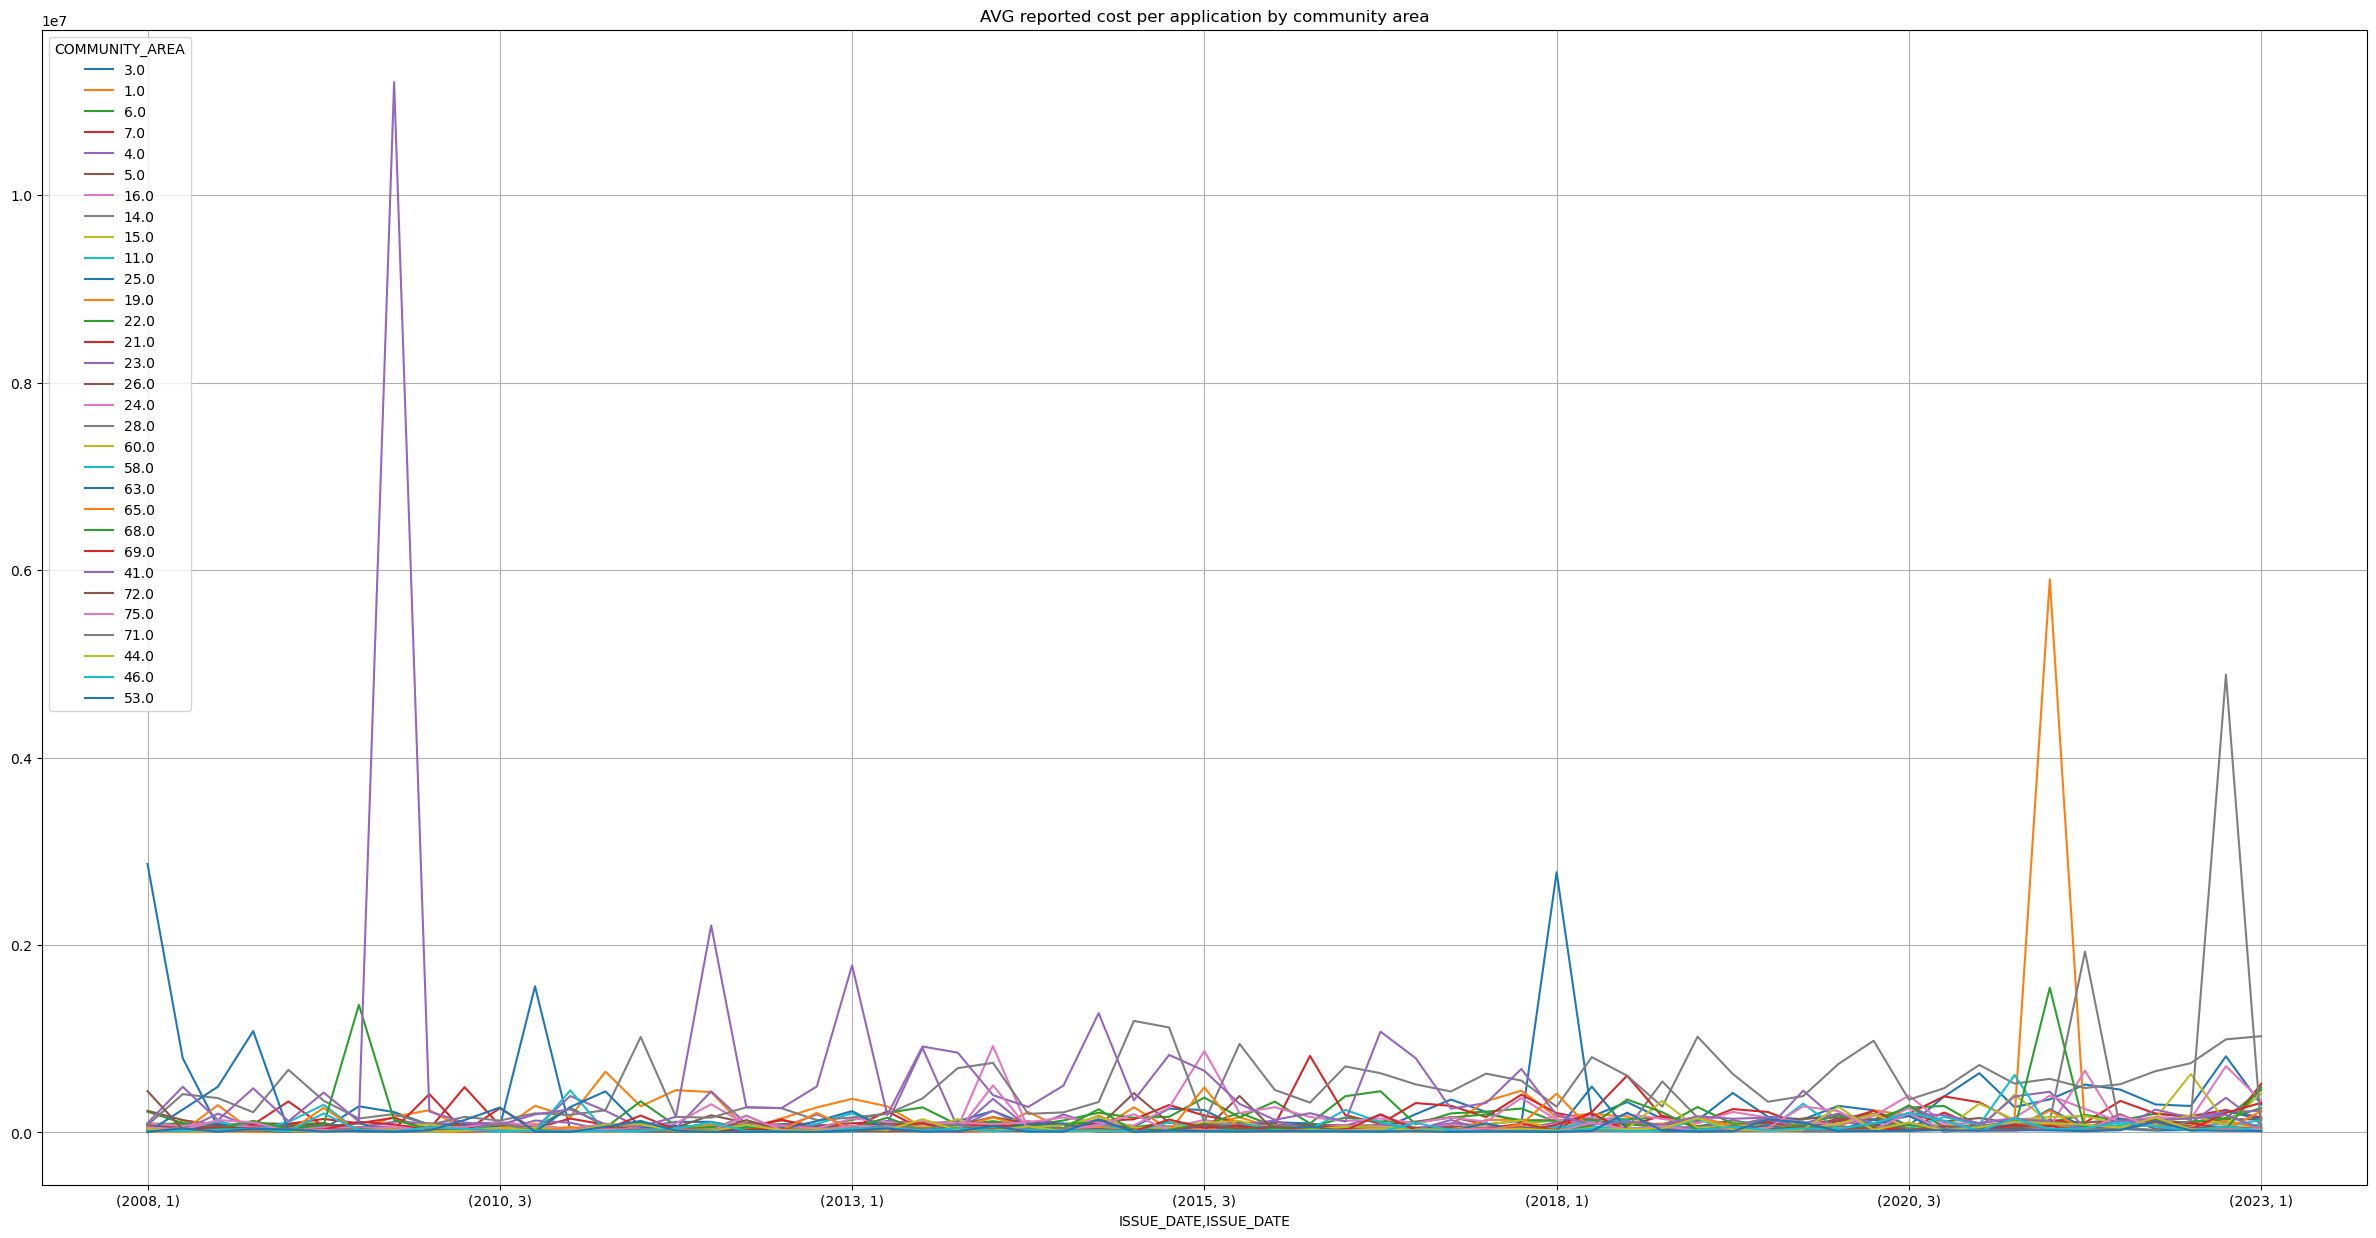

In [711]:
reported_cost_community2.unstack()[areas].plot(figsize=(30,15), grid=True, title='AVG reported cost per application by community area');

In [712]:
renov_df=chicago_wip4[chicago_wip4['PERMIT_TYPE']=='PERMIT - RENOVATION/ALTERATION']

In [713]:
reported_cost_renov=renov_df.groupby([renov_df['ISSUE_DATE'].dt.year,renov_df['ISSUE_DATE'].dt.quarter,'COMMUNITY_AREA'])['REPORTED_COST'].sum()

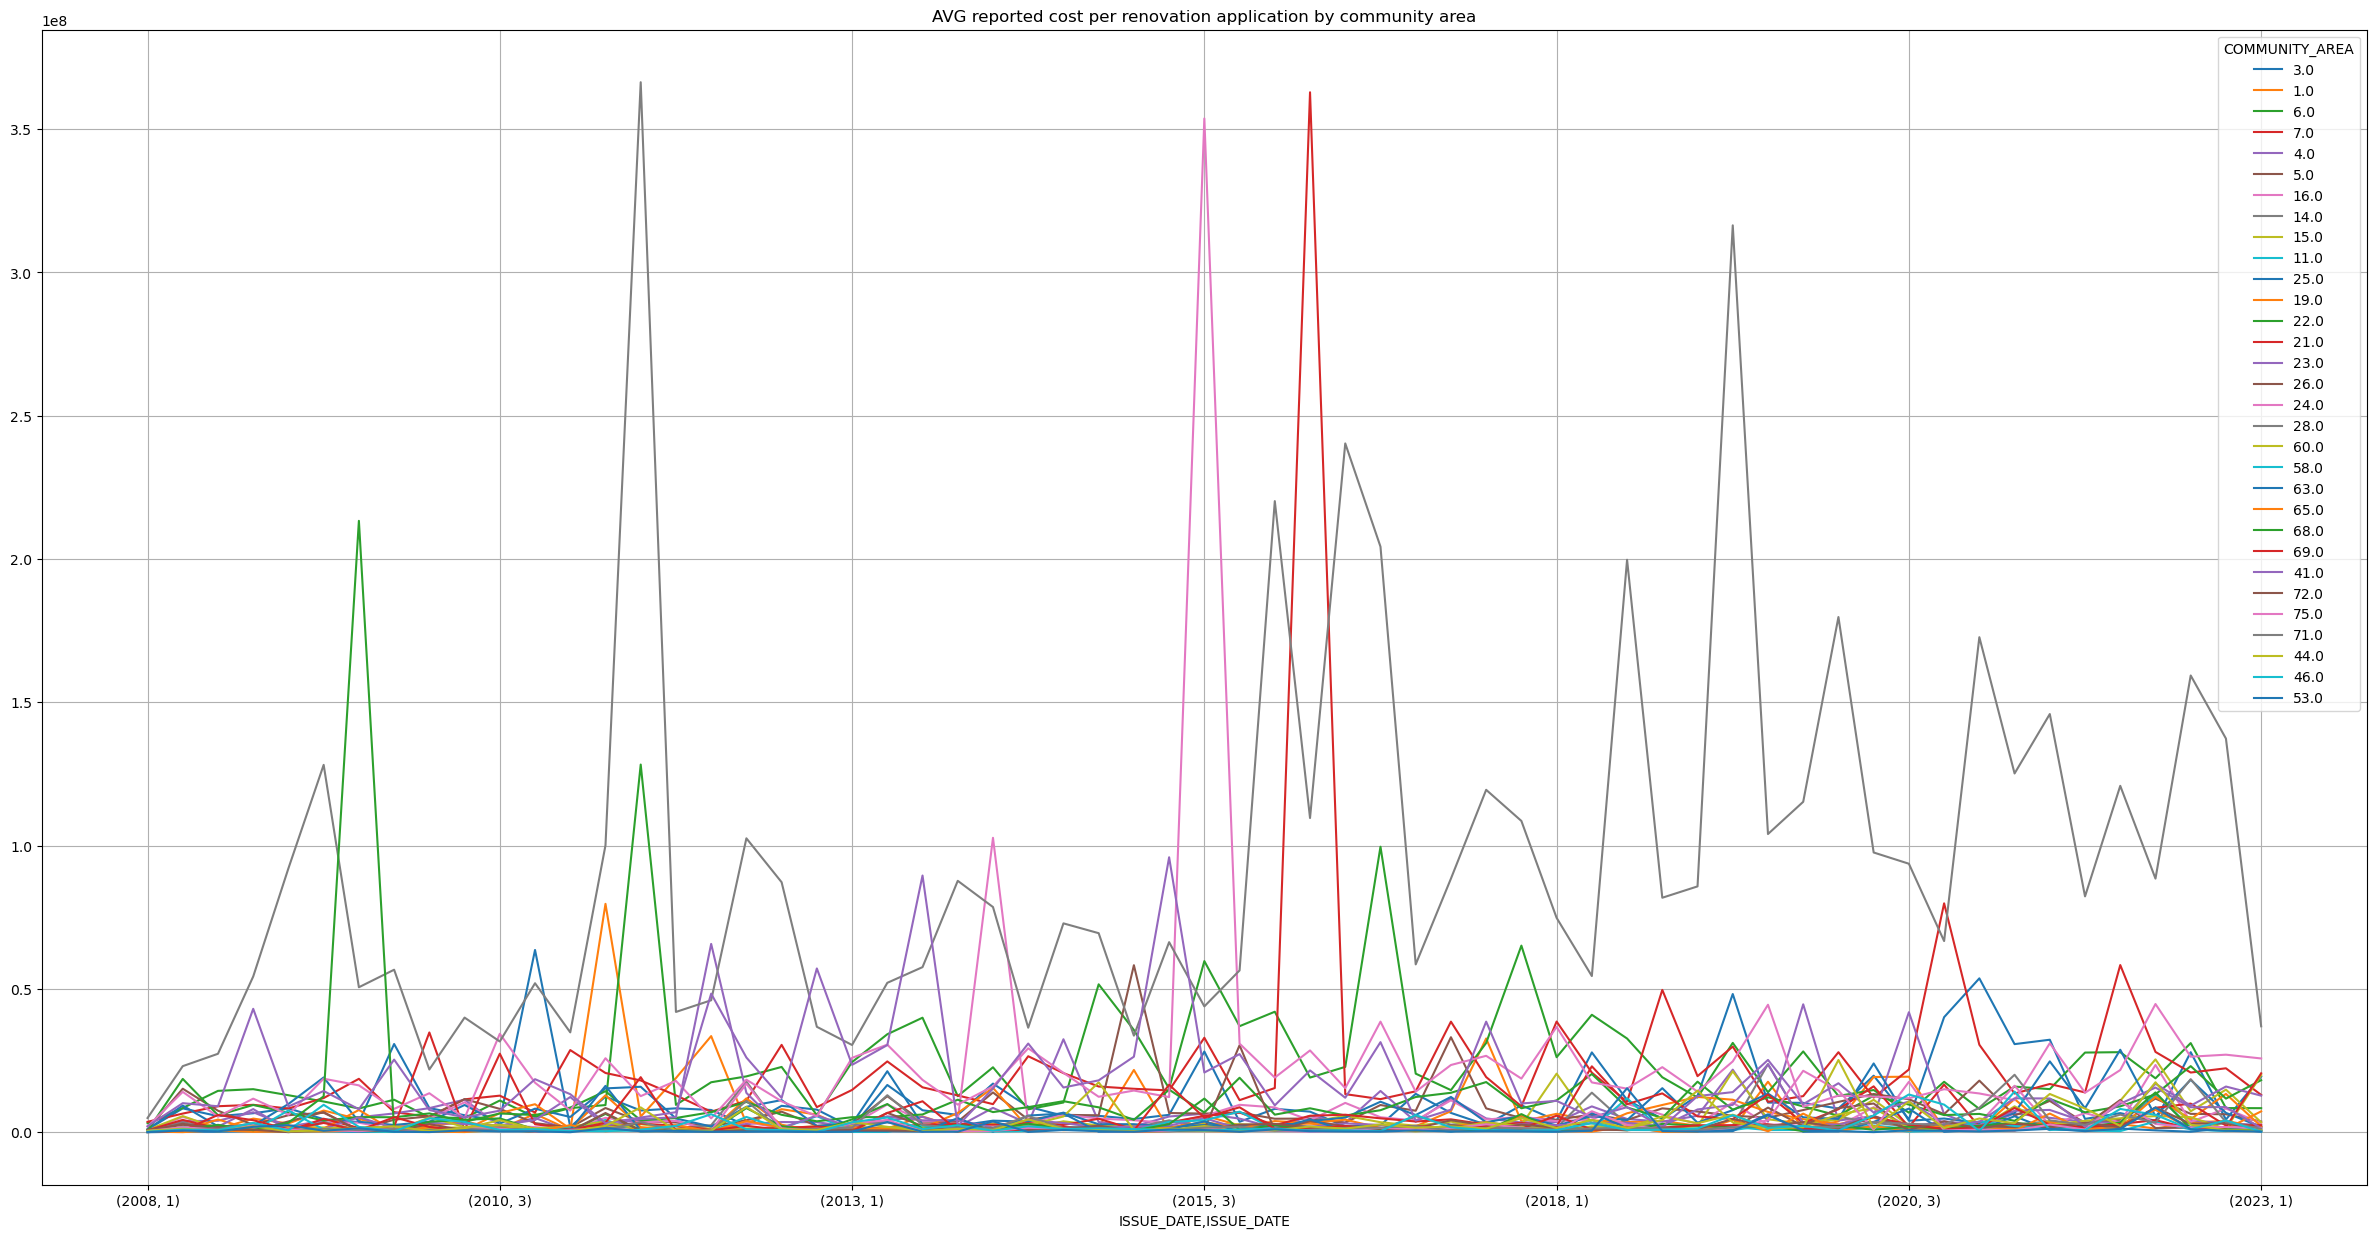

In [714]:
reported_cost_renov.unstack()[areas].plot(figsize=(30,15), grid=True, title='AVG reported cost per renovation application by community area');

ok, let's take the average of all predicted costs for each community and, then, calculate the percentage deviation from the average for each quarter

In [715]:
reported_cost_renov

ISSUE_DATE  ISSUE_DATE  COMMUNITY_AREA
2008        1           1.0                 281000.0
                        2.0                 607600.0
                        3.0                 982000.0
                        4.0                 315250.0
                        5.0                1026460.0
                                             ...    
2023        1           73.0               1173000.0
                        74.0                857270.0
                        75.0               1398685.0
                        76.0              40112589.0
                        77.0               6861061.0
Name: REPORTED_COST, Length: 4649, dtype: float64

In [716]:
reported_cost_renov2=reported_cost_renov.unstack()
reported_cost_renov2.head()

COMMUNITY_AREA         0.0        1.0        2.0        3.0        4.0   \
ISSUE_DATE ISSUE_DATE                                                     
2008       1            NaN   281000.0   607600.0   982000.0   315250.0   
           2            NaN  1748300.0  2962600.0  8330545.0  3889175.0   
           3            NaN  1177480.0  2347900.0  5618026.0  4004101.0   
           4            NaN  4763102.0  1495120.0  6630023.0  6984001.0   
2009       1            NaN  3077900.0  1094800.0  8337900.0  2045583.0   

COMMUNITY_AREA               5.0         6.0        7.0          8.0   \
ISSUE_DATE ISSUE_DATE                                                   
2008       1            1026460.0   3153300.0  3638001.0   38789306.0   
           2           15183874.0   8453456.0  6514764.0   73355910.0   
           3            7515100.0  14441690.0  9078501.0   71911931.0   
           4            2602700.0  15027153.0  9567755.0  261083044.0   
2009       1            5945896.0  12917878.0  8293880.0   77050278.0   

COMMUNITY_AREA             9.0   ...       68.0       69.0       70.0  \
ISSUE_DATE ISSUE_DATE            ...                                    
2008       1           230000.0  ...   186300.0    54000.0   132000.0   
           2           903000.0  ...   872432.5   608500.0  1003400.0   
           3           732900.0  ...  2574300.0  6033376.0   611041.0   
           4           165800.0  ...   722000.0  4199138.0   898800.0   
2009       1           715000.0  ...  3320367.0  1027160.0  1831000.0   

COMMUNITY_AREA              71.0       72.0       73.0        74.0       75.0  \
ISSUE_DATE ISSUE_DATE                                                           
2008       1            254788.5   189000.0    55694.0   120000.00   425000.0   
           2            663161.0  2987500.0   188120.0  2290853.12  1719156.0   
           3           1142500.0   773500.0  4315040.0  1548840.00   922000.0   
           4           3203069.0   891600.0  1317155.0   742000.00  2571375.0   
2009       1            228800.0    41500.0   291800.0  2425000.00   940125.0   

COMMUNITY_AREA              76.0        77.0  
ISSUE_DATE ISSUE_DATE                         
2008       1           5265000.0    659470.0  
           2           5292701.0   5368979.0  
           3           6785600.0   5119980.0  
           4           4109706.0  11691700.0  
2009       1           2720620.0   5403770.0  

[5 rows x 78 columns]

In [717]:
reported_cost_renov2.index[:8]

MultiIndex([(2008, 1),
            (2008, 2),
            (2008, 3),
            (2008, 4),
            (2009, 1),
            (2009, 2),
            (2009, 3),
            (2009, 4)],
           names=['ISSUE_DATE', 'ISSUE_DATE'])

In [718]:
years=[]
quarters=[]
for i in reported_cost_renov2.index:
    years.append(i[0])
    quarters.append(i[1])

In [719]:
reported_cost_renov3=reported_cost_renov2.reset_index(drop=True)

In [720]:
reported_cost_renov3.drop(columns=0.0,inplace=True)

In [721]:
reported_cost_renov3.insert(0,'YEAR',years)

In [722]:
reported_cost_renov3.insert(1,'QUARTER',quarters)

In [723]:
reported_cost_renov3.head()

COMMUNITY_AREA  YEAR  QUARTER        1.0        2.0        3.0        4.0  \
0               2008        1   281000.0   607600.0   982000.0   315250.0   
1               2008        2  1748300.0  2962600.0  8330545.0  3889175.0   
2               2008        3  1177480.0  2347900.0  5618026.0  4004101.0   
3               2008        4  4763102.0  1495120.0  6630023.0  6984001.0   
4               2009        1  3077900.0  1094800.0  8337900.0  2045583.0   

COMMUNITY_AREA         5.0         6.0        7.0          8.0  ...  \
0                1026460.0   3153300.0  3638001.0   38789306.0  ...   
1               15183874.0   8453456.0  6514764.0   73355910.0  ...   
2                7515100.0  14441690.0  9078501.0   71911931.0  ...   
3                2602700.0  15027153.0  9567755.0  261083044.0  ...   
4                5945896.0  12917878.0  8293880.0   77050278.0  ...   

COMMUNITY_AREA       68.0       69.0       70.0       71.0       72.0  \
0                186300.0    54000.0   132000.0   254788.5   189000.0   
1                872432.5   608500.0  1003400.0   663161.0  2987500.0   
2               2574300.0  6033376.0   611041.0  1142500.0   773500.0   
3                722000.0  4199138.0   898800.0  3203069.0   891600.0   
4               3320367.0  1027160.0  1831000.0   228800.0    41500.0   

COMMUNITY_AREA       73.0        74.0       75.0       76.0        77.0  
0                 55694.0   120000.00   425000.0  5265000.0    659470.0  
1                188120.0  2290853.12  1719156.0  5292701.0   5368979.0  
2               4315040.0  1548840.00   922000.0  6785600.0   5119980.0  
3               1317155.0   742000.00  2571375.0  4109706.0  11691700.0  
4                291800.0  2425000.00   940125.0  2720620.0   5403770.0  

[5 rows x 79 columns]

In [724]:
avg_costs=reported_cost_renov3.iloc[:,2:].mean()
avg_costs

COMMUNITY_AREA
1.0     6.703444e+06
2.0     4.263048e+06
3.0     1.242579e+07
4.0     6.658883e+06
5.0     7.783004e+06
            ...     
73.0    1.639715e+06
74.0    2.094342e+06
75.0    2.545023e+06
76.0    1.297205e+08
77.0    7.733792e+06
Length: 77, dtype: float64

In [725]:
reported_cost_renov4=reported_cost_renov3.copy()
for col in reported_cost_renov3.columns[2:]:
    reported_cost_renov4[col]=reported_cost_renov3[col]/avg_costs[col]
    

In [726]:
reported_cost_renov4.tail(1)

COMMUNITY_AREA  YEAR  QUARTER       1.0       2.0       3.0      4.0  \
60              2023        1  0.246773  0.499056  1.565268  0.39376   

COMMUNITY_AREA       5.0       6.0       7.0       8.0  ...      68.0  \
60              0.480358  0.361615  0.529522  0.249376  ...  0.121149   

COMMUNITY_AREA      69.0     70.0      71.0      72.0      73.0      74.0  \
60              6.474478  0.17894  0.450188  0.390287  0.715368  0.409327   

COMMUNITY_AREA      75.0      76.0      77.0  
60              0.549577  0.309223  0.887154  

[1 rows x 79 columns]

We have visualized the house prices per community area - but is it an actually meaningful variable? In other words, is there a stistically significant difference between how the prices were changing for each community?

In [727]:
prices_df_wip8.head()

YEAR  QUARTER  CHICAGO       3       1       6       7       4       5  \
0  2008        1   199.90  186.57  186.57  169.84  169.84  202.53  202.53   
1  2008        2   194.15  185.11  185.11  173.84  173.84  199.33  199.33   
2  2008        3   185.49  173.78  173.78  169.24  169.24  192.16  192.16   
3  2008        4   177.70  177.28  177.28  165.41  165.41  188.11  188.11   
4  2009        1   168.42  172.92  172.92  165.58  165.58  183.28  183.28   

       16  ...      68      69      38      41      72      75      71  \
0  189.77  ...  242.33  242.33  239.50  239.50  186.94  186.94  187.41   
1  185.57  ...  231.29  231.29  233.37  233.37  179.23  179.23  183.09   
2  178.29  ...  213.16  213.16  216.28  216.28  172.93  172.93  176.09   
3  173.33  ...  202.28  202.28  198.29  198.29  165.64  165.64  169.20   
4  168.44  ...  175.62  175.62  182.58  182.58  157.68  157.68  158.34   

       44      46      53  
0  187.41  187.56  187.56  
1  183.09  182.65  182.65  
2  176.09  171.06  171.06  
3  169.20  164.49  164.49  
4  158.34  157.86  157.86  

[5 rows x 35 columns]

In [728]:
city_change=(prices_df_wip8['CHICAGO'].shift(1)-prices_df_wip8['CHICAGO'])
#price_change=(prices_df_wip8.shift(1)-prices_df_wip8)[2:]

In [729]:
prices_df_wip8.head()

YEAR  QUARTER  CHICAGO       3       1       6       7       4       5  \
0  2008        1   199.90  186.57  186.57  169.84  169.84  202.53  202.53   
1  2008        2   194.15  185.11  185.11  173.84  173.84  199.33  199.33   
2  2008        3   185.49  173.78  173.78  169.24  169.24  192.16  192.16   
3  2008        4   177.70  177.28  177.28  165.41  165.41  188.11  188.11   
4  2009        1   168.42  172.92  172.92  165.58  165.58  183.28  183.28   

       16  ...      68      69      38      41      72      75      71  \
0  189.77  ...  242.33  242.33  239.50  239.50  186.94  186.94  187.41   
1  185.57  ...  231.29  231.29  233.37  233.37  179.23  179.23  183.09   
2  178.29  ...  213.16  213.16  216.28  216.28  172.93  172.93  176.09   
3  173.33  ...  202.28  202.28  198.29  198.29  165.64  165.64  169.20   
4  168.44  ...  175.62  175.62  182.58  182.58  157.68  157.68  158.34   

       44      46      53  
0  187.41  187.56  187.56  
1  183.09  182.65  182.65  
2  176.09  171.06  171.06  
3  169.20  164.49  164.49  
4  158.34  157.86  157.86  

[5 rows x 35 columns]

In [730]:
pr_change_df=prices_df_wip8.iloc[:,0:2]
pr_change_df.head()

YEAR  QUARTER
0  2008        1
1  2008        2
2  2008        3
3  2008        4
4  2009        1

In [731]:
#need to divide each field by city_change to create a new column in the new df pr_change_df
for col in prices_df_wip8.columns[2:]:
    pr_change_df[col]=(prices_df_wip8[col].shift(1)-prices_df_wip8[col])/city_change

In [732]:
pr_change_df2=pr_change_df.drop(index=0).reset_index().drop(columns='index')
pr_change_df2.tail()

YEAR  QUARTER  CHICAGO         3         1         6         7         4  \
52  2021        2      1.0  0.073409  0.073409  1.615008  1.615008  1.504078   
53  2021        3      1.0  0.431818  0.431818  0.708556  0.708556  0.707219   
54  2021        4      1.0  0.305825  0.305825  0.359223  0.359223  0.517799   
55  2022        1      1.0  0.293814  0.293814  0.146907  0.146907  0.346649   
56  2022        2      1.0  1.804494  1.804494  0.434831  0.434831  0.905618   

           5        16  ...        68        69        38        41        72  \
52  1.504078  1.336052  ...  1.081566  1.081566  1.019576  1.019576  1.181077   
53  0.707219  0.754011  ...  1.516043  1.516043  1.609626  1.609626  1.036096   
54  0.517799  1.079288  ...  1.407767  1.407767  1.389968  1.389968  1.213592   
55  0.346649  1.054124  ...  2.233247  2.233247  0.971649  0.971649  1.034794   
56  0.905618  0.957303  ...  1.422472  1.422472  1.229213  1.229213  0.924719   

          75        71        44        46        53  
52  1.181077  1.122349  1.122349  0.603589  0.603589  
53  1.036096  1.508021  1.508021  1.402406  1.402406  
54  1.213592  1.064725  1.064725  1.487055  1.487055  
55  1.034794  1.369845  1.369845  1.278351  1.278351  
56  0.924719  1.451685  1.451685  0.892135  0.892135  

[5 rows x 35 columns]

In [733]:
reported_cost_renov4.tail(1)

COMMUNITY_AREA  YEAR  QUARTER       1.0       2.0       3.0      4.0  \
60              2023        1  0.246773  0.499056  1.565268  0.39376   

COMMUNITY_AREA       5.0       6.0       7.0       8.0  ...      68.0  \
60              0.480358  0.361615  0.529522  0.249376  ...  0.121149   

COMMUNITY_AREA      69.0     70.0      71.0      72.0      73.0      74.0  \
60              6.474478  0.17894  0.450188  0.390287  0.715368  0.409327   

COMMUNITY_AREA      75.0      76.0      77.0  
60              0.549577  0.309223  0.887154  

[1 rows x 79 columns]

<AxesSubplot:>

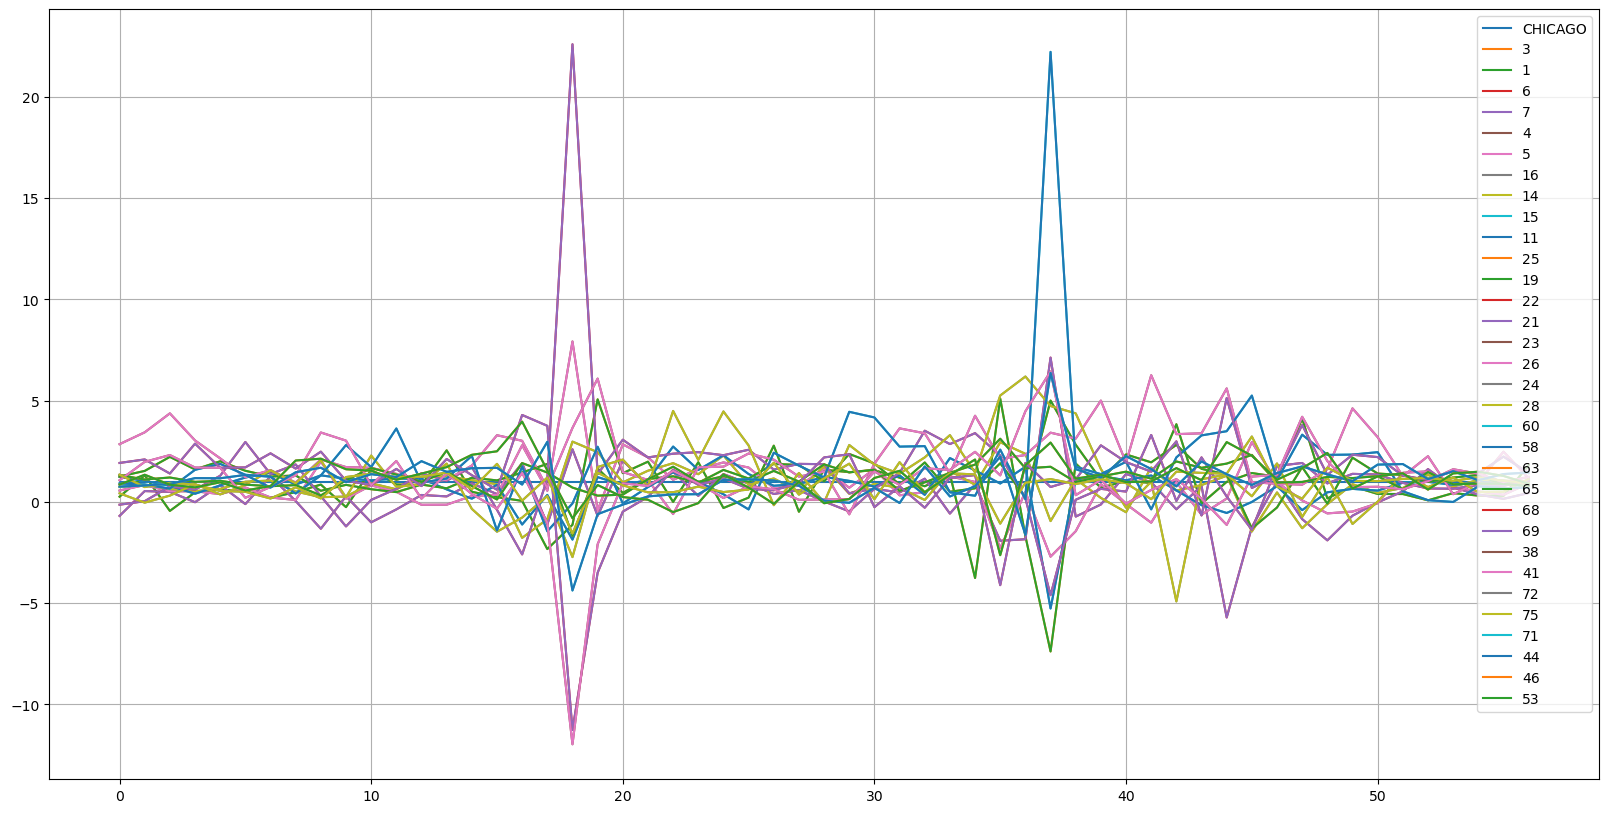

In [734]:
pr_change_df2.iloc[:,2:].plot(figsize=(20,10),grid=True)

Prediction 1: let's suppose increased applications cause accelerate price change in one year

# TOTAL MESS STARTS HERE

In [757]:
#Ok these are our price changes (target variable) - the last quarter that we have data for is quarter 2 2022
#Hence for our renovation costs we should only have data up until quarter 2 2021

In [761]:
pr_change_df2.head(1)

YEAR  QUARTER  CHICAGO         3         1         6         7         4  \
0  2008        2      1.0  0.253913  0.253913 -0.695652 -0.695652  0.556522   

          5        16  ...    68    69        38        41       72       75  \
0  0.556522  0.730435  ...  1.92  1.92  1.066087  1.066087  1.34087  1.34087   

         71        44        46        53  
0  0.751304  0.751304  0.853913  0.853913  

[1 rows x 35 columns]

In [765]:
pr_change_df2[]

YEAR  QUARTER  CHICAGO         3         1         6         7         4  \
0     NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
1     NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
2     NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
3     NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN   
4  2008.0      2.0      1.0  0.253913  0.253913 -0.695652 -0.695652  0.556522   

          5        16  ...    68    69        38        41       72       75  \
0       NaN       NaN  ...   NaN   NaN       NaN       NaN      NaN      NaN   
1       NaN       NaN  ...   NaN   NaN       NaN       NaN      NaN      NaN   
2       NaN       NaN  ...   NaN   NaN       NaN       NaN      NaN      NaN   
3       NaN       NaN  ...   NaN   NaN       NaN       NaN      NaN      NaN   
4  0.556522  0.730435  ...  1.92  1.92  1.066087  1.066087  1.34087  1.34087   

         71        44        46        53  
0       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN  
2       NaN       NaN       NaN       NaN  
3       NaN       NaN       NaN       NaN  
4  0.751304  0.751304  0.853913  0.853913  

[5 rows x 35 columns]

In [758]:
pr_change_df2.tail(1)

YEAR  QUARTER  CHICAGO         3         1         6         7         4  \
56  2022        2      1.0  1.804494  1.804494  0.434831  0.434831  0.905618   

           5        16  ...        68        69        38        41        72  \
56  0.905618  0.957303  ...  1.422472  1.422472  1.229213  1.229213  0.924719   

          75        71        44        46        53  
56  0.924719  1.451685  1.451685  0.892135  0.892135  

[1 rows x 35 columns]

In [762]:
reported_cost_renov4.head(1)

COMMUNITY_AREA  YEAR  QUARTER       1.0       2.0       3.0       4.0  \
0               2008        1  0.041919  0.142527  0.079029  0.047343   

COMMUNITY_AREA       5.0       6.0       7.0       8.0  ...      68.0  \
0               0.131885  0.135761  0.147981  0.150038  ...  0.030708   

COMMUNITY_AREA      69.0      70.0      71.0      72.0      73.0      74.0  \
0               0.017003  0.076145  0.094289  0.110724  0.033966  0.057297   

COMMUNITY_AREA      75.0      76.0      77.0  
0               0.166993  0.040587  0.085271  

[1 rows x 79 columns]

In [796]:
renov_final_t=reported_cost_renov4.iloc[0:-7]
renov_final=renov_final_t[areas]
renov_final.head()

COMMUNITY_AREA      3.0       1.0       6.0       7.0       4.0       5.0   \
0               0.079029  0.041919  0.135761  0.147981  0.047343  0.131885   
1               0.670424  0.260806  0.363951  0.264998  0.584058  1.950902   
2               0.452126  0.175653  0.621766  0.369282  0.601317  0.965578   
3               0.533570  0.710546  0.646972  0.389183  1.048825  0.334408   
4               0.671016  0.459152  0.556160  0.337366  0.307196  0.763959   

COMMUNITY_AREA      16.0      14.0      15.0      11.0  ...      68.0  \
0               0.060267  0.116731  0.210126  0.049650  ...  0.030708   
1               0.814462  1.162274  1.438010  1.227525  ...  0.143802   
2               0.258266  0.458249  0.345333  0.563529  ...  0.424320   
3               0.202372  0.311119  0.267434  0.847954  ...  0.119007   
4               0.234350  0.251509  0.490572  0.144482  ...  0.547294   

COMMUNITY_AREA      69.0      38.0      41.0      72.0      75.0      71.0  \
0               0.017003  0.028022  0.120351  0.110724  0.166993  0.094289   
1               0.191602  1.868217  0.582116  1.750199  0.675497  0.245415   
2               1.899765  0.403069  0.520168  0.453148  0.362276  0.422803   
3               1.322207  0.422614  2.471277  0.522336  1.010354  1.185354   
4               0.323428  0.286429  0.516118  0.024312  0.369397  0.084672   

COMMUNITY_AREA      44.0      46.0      53.0  
0               0.159209  0.069464  0.046393  
1               0.377882  0.365320  0.548055  
2               0.108622  0.275831  0.275310  
3               0.655286  1.287131  1.743544  
4               0.093325  0.269063  2.288765  

[5 rows x 32 columns]

In [821]:
price_final=pr_change_df2.iloc[3:,3:].reset_index(drop=True)

In [822]:
price_final.shape

(54, 32)

In [766]:
#these are all areas
#reported_cost_renov4.iloc[0:-3,2:].plot(figsize=(30,15),grid=True);

In [753]:
renov_costs_change=reported_cost_renov4.iloc[0:-3,2:].loc[:,areas]

<AxesSubplot:>

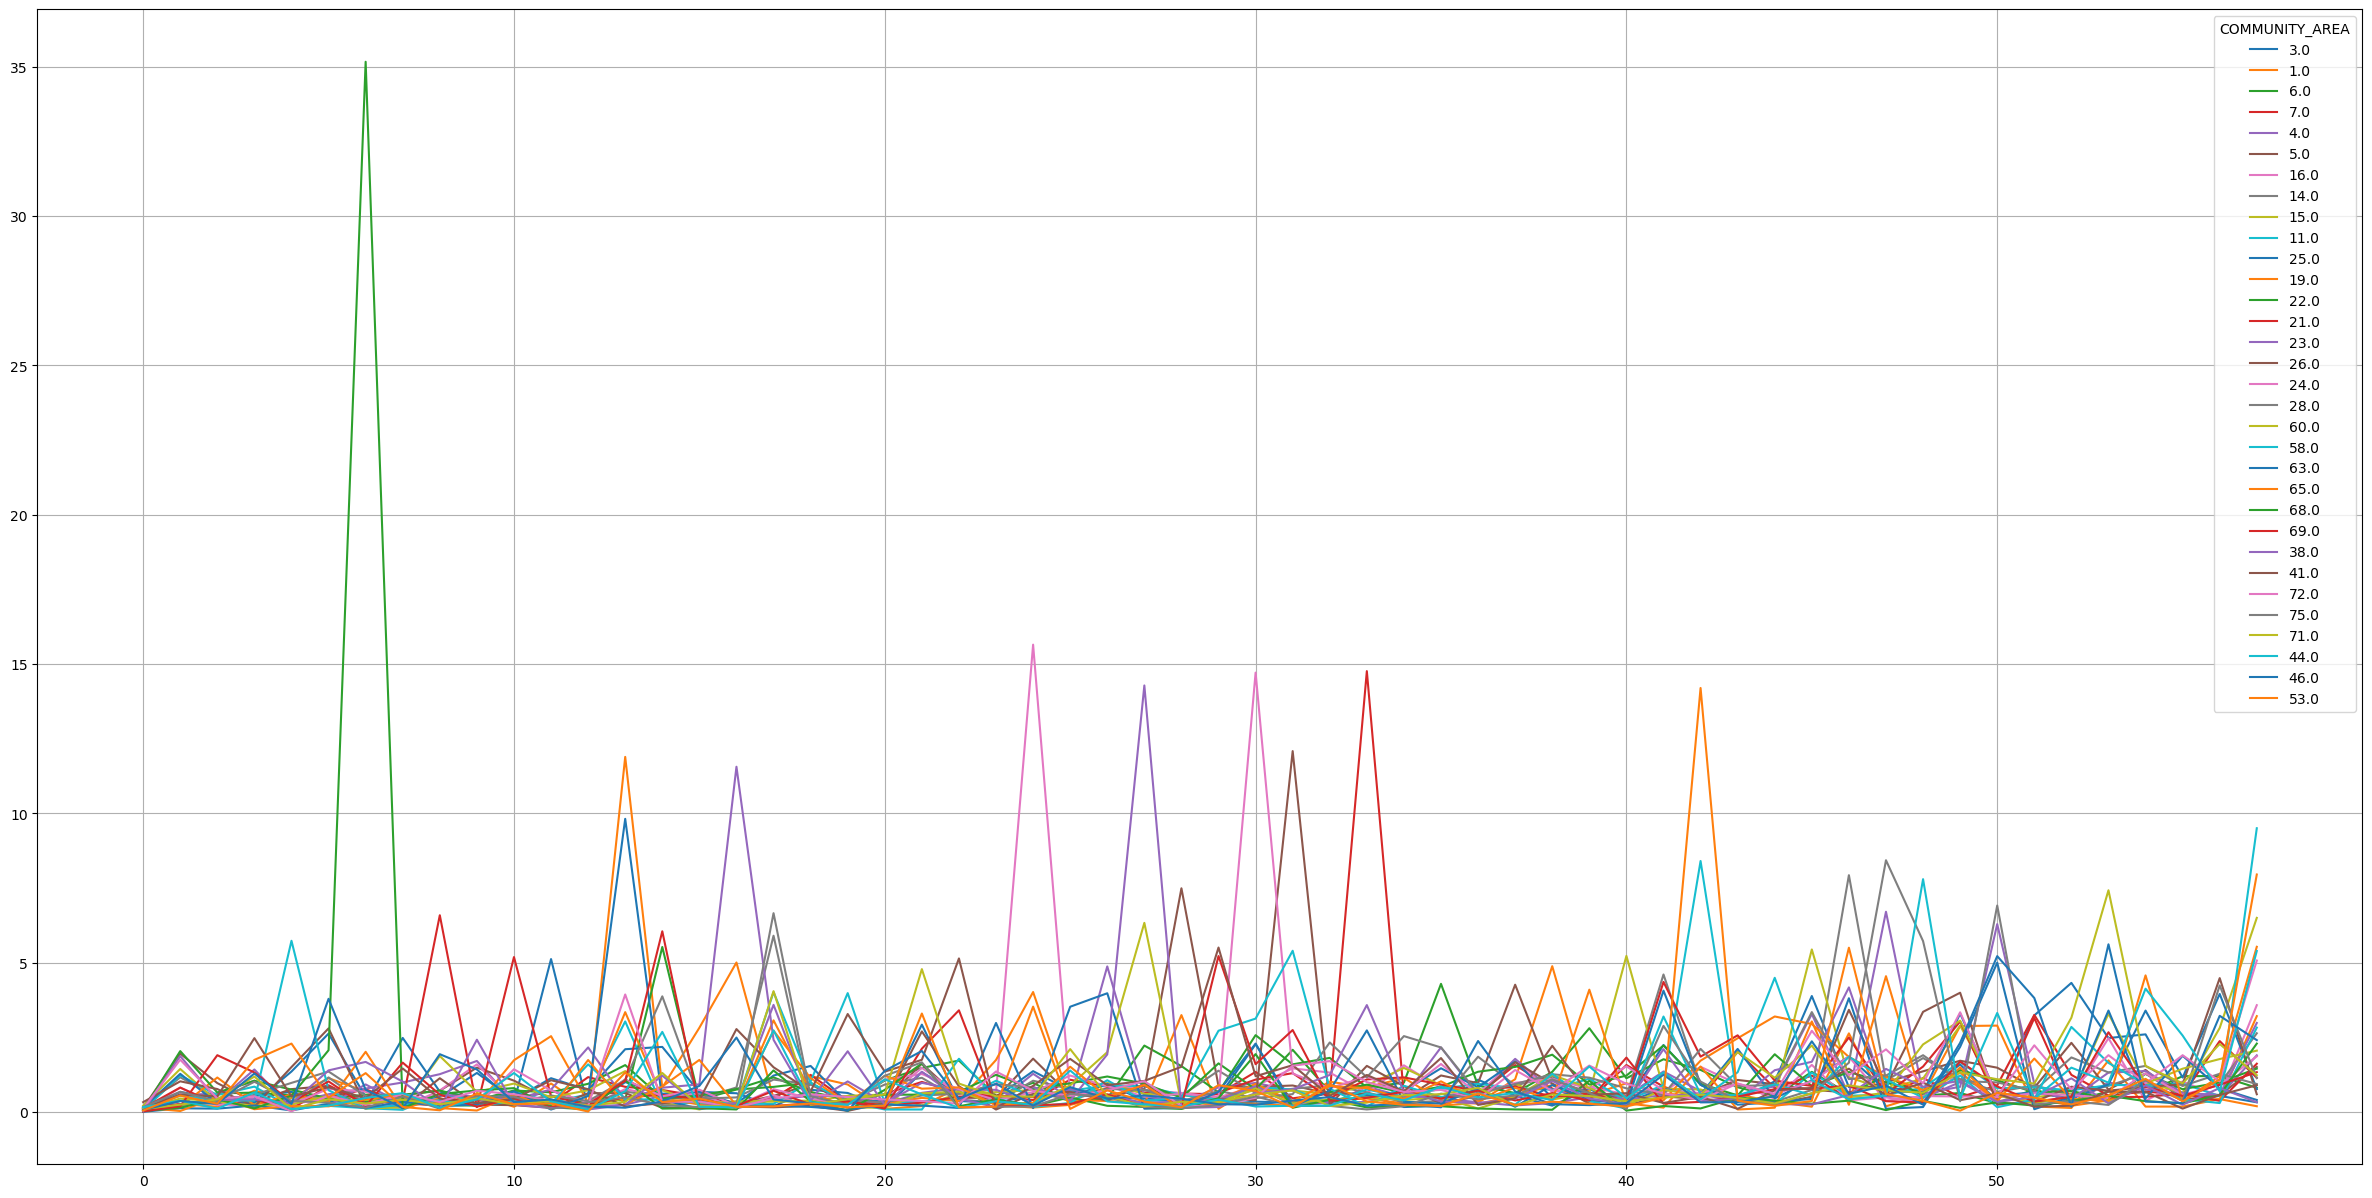

In [754]:
renov_costs_change.plot(figsize=(30,15), grid=True)

In [740]:
price_change=pr_change_df2.iloc[:,3:]

In [741]:
pr_change_df2.tail(1)

YEAR  QUARTER  CHICAGO         3         1         6         7         4  \
56  2022        2      1.0  1.804494  1.804494  0.434831  0.434831  0.905618   

           5        16  ...        68        69        38        41        72  \
56  0.905618  0.957303  ...  1.422472  1.422472  1.229213  1.229213  0.924719   

          75        71        44        46        53  
56  0.924719  1.451685  1.451685  0.892135  0.892135  

[1 rows x 35 columns]

<AxesSubplot:>

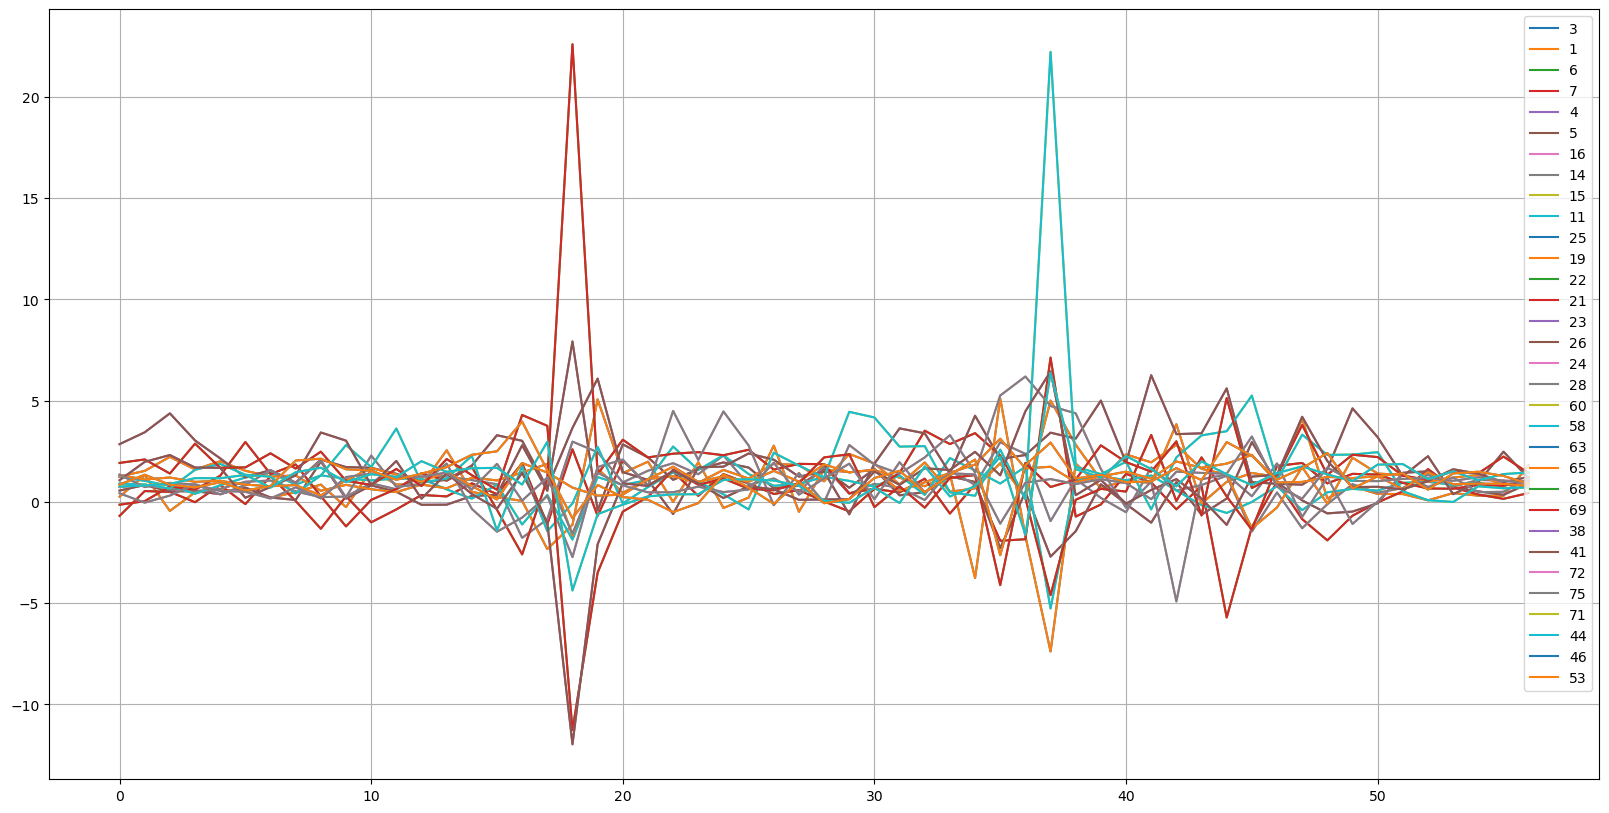

In [742]:
price_change.plot(figsize=(20,10),grid=True)

In [743]:
#renov_costs_change vs price_change

In [755]:
renov_costs_change.shape

(58, 32)

In [751]:
price_change.shape

(57, 32)

In [ ]:
#price_final vs renov_final

In [790]:
import seaborn as sns

<AxesSubplot:>

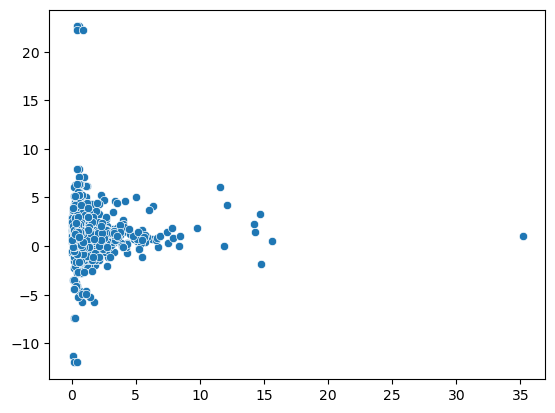

In [828]:
sns.scatterplot(x=renov_list,y=price_list)

In [837]:
test=pd.DataFrame({'x':renov_list,'y':price_list})

In [838]:
test.corr()

x         y
x  1.000000  0.013957
y  0.013957  1.000000

In [839]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats

In [840]:
stats.pearsonr(renov_list,price_list)

PearsonRResult(statistic=0.01395689006815116, pvalue=0.5620593208882761)

In [817]:
renov_final.shape

(54, 32)

In [818]:
price_final.shape

(5, 32)

In [810]:
renov_list=[]
for col in renov_final.columns:
    for item in renov_final[col]:
        renov_list.append(item)

In [815]:
len(renov_list)

1728

In [823]:
price_list=[]
for col in price_final.columns:
    for item in price_final[col]:
        price_list.append(item)

In [824]:
len(price_list)

1728